## Librerías

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree,  _tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.metrics import f1_score

from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.ensemble import  RandomForestClassifier
from sklearn.impute import SimpleImputer
from joblib import Parallel, delayed
from time import time
import duckdb
# %load_ext sql
# %config SqlMagic.autopandas = True
# %config SqlMagic.feedback = False
# %config SqlMagic.displaycon = False
# %sql duckdb:///:memory:
import time
import optuna
from optuna.visualization import plot_param_importances, plot_contour,  plot_slice, plot_optimization_history
import plotly.express as px


In [3]:
semillas =[ 400009,  500009,  600011,  700021,  800021]

In [4]:
# import duckdb


# con = duckdb.connect(database=':memory:', read_only=False)


# con.execute("CREATE TABLE df_train AS SELECT * FROM read_csv_auto('C:/Users/Admin/Documents/1_Notebook/1_Estudio/1 UBA Maestría DS/1_Especialización/1_Segundo Semestre/DMEyF/Git/dmeyf2024/datasets/competencia_01.csv')")



In [5]:
# df_train = pd.read_csv(r"C:\Users\Admin\Documents\1_Notebook\1_Estudio\1 UBA Maestría DS\1_Especialización\1_Segundo Semestre\DMEyF\Git\dmeyf2024\datasets\competencia_01.csv")

In [6]:
# import pandas as pd



# import numpy as np



# df_parallel = pd.read_csv(r"C:\Users\Admin\Documents\1_Notebook\1_Estudio\1 UBA Maestría DS\1_Especialización\1_Segundo Semestre\DMEyF\Git\dmeyf2024\datasets\competencia_01_crudo.csv")



# start_time = time.time()

# # Crear la columna clase_ternaria usando la columna 'foto_mes' basada en la presencia real

# df_ternaria= duckdb.query('''

#     WITH siguiente_mes AS (

#         SELECT

#             numero_de_cliente,

#             foto_mes,

#             -- Obtener los meses siguientes en los que el cliente está presente

#             LEAD(foto_mes, 1) OVER (PARTITION BY numero_de_cliente ORDER BY foto_mes) AS foto_mes_proximo1,

#             LEAD(foto_mes, 2) OVER (PARTITION BY numero_de_cliente ORDER BY foto_mes) AS foto_mes_proximo2

#         FROM df_parallel

#     )

#     SELECT

#         numero_de_cliente,

#         foto_mes,

#         CASE

#             -- Si el cliente está en los dos meses consecutivos siguientes

#             WHEN foto_mes_proximo1 = foto_mes + 1 AND foto_mes_proximo2 = foto_mes + 2 THEN 'CONTINUA'

#             -- Si el cliente no está en el siguiente mes

#             WHEN foto_mes_proximo1 IS NULL OR foto_mes_proximo1 <> foto_mes + 1 THEN 'BAJA+1'

#             -- Si el cliente está en el siguiente mes pero no en el segundo mes consecutivo

#             WHEN foto_mes_proximo1 = foto_mes + 1 AND (foto_mes_proximo2 IS NULL OR foto_mes_proximo2 <> foto_mes + 2) THEN 'BAJA+2'

#             ELSE NULL

#         END AS clase_ternaria

#     FROM siguiente_mes

#     ORDER BY numero_de_cliente, foto_mes

#     ''')

# df_ternaria = df_ternaria.to_df()
# df_ternaria = df_ternaria[['numero_de_cliente', 'foto_mes', 'clase_ternaria']]


# df_parallel = df_parallel.merge(df_ternaria, on=['numero_de_cliente', 'foto_mes'], how='left')

# df_parallel.to_csv(r"C:\Users\Admin\Documents\1_Notebook\1_Estudio\1 UBA Maestría DS\1_Especialización\1_Segundo Semestre\DMEyF\Git\dmeyf2024\datasets\competencia_01.csv", index=False)

# Analisis exploratorio 

df_train.columns.values

### Feature Engineering

In [7]:
# con.execute('''
# CREATE OR REPLACE TABLE df_train AS
# SELECT *,
#     (COALESCE(mpayroll, 0) - COALESCE(mcuentas_saldo, 0)) / NULLIF(ctrx_quarter, 0) AS intensidad_gasto
# FROM df_train
# ''')

In [8]:
# df_train['intensidad_gasto'] = (df_train['mpayroll'].fillna(0) - df_train['mcuentas_saldo'].fillna(0)) / df_train['ctrx_quarter'].replace(0, pd.NA)

In [9]:
# con.execute('''
# create or replace table df_train as
# select 
#     *,
#     (IFNULL(visa_msaldototal, 0) + IFNULL(master_msaldototal, 0)) as t_saldo_total
# from df_train''')




In [10]:
# df_train['t_saldo_total'] = df_train['Visa_msaldototal'].fillna(0) + df_train['Master_msaldototal'].fillna(0)

In [11]:
# con.execute('''
# create or replace table df_train as
# select 
#     *,
#     (ifnull(Master_mconsumototal,0) + ifnull(Visa_mconsumototal,0)) as t_consumo_total
# from df_train''')


In [12]:
# df_train['t_consumo_total'] = df_train['Master_mconsumototal'].fillna(0) + df_train['Visa_mconsumototal'].fillna(0)

In [13]:
# con.execute('''
# create or replace table df_train as
# select
#     *,
#     (case when visa_status = 0 then True end) as T_Visa_normal,
#     (case when Master_status = 0 then True end) as T_Master_normal
# from df_train''')

In [14]:
# df_train['T_Visa_normal'] = df_train['Visa_status'] == 0


# df_train['T_Master_normal'] = df_train['Master_status'] == 0

In [15]:
# con.execute('''
# create or replace table df_train as
# select *
#     , greatest(Master_Fvencimiento, Visa_Fvencimiento) as tc_fvencimiento_mayor
#     , least(Master_Fvencimiento, Visa_Fvencimiento) as tc_fvencimiento_menor
# from df_train''')

In [16]:
# df_train['T_Visa_normal'] = df_train['Visa_status'] == 0

# # Calcular la nueva columna T_Master_normal
# df_train['T_Master_normal'] = df_train['Master_status'] == 0

In [17]:
# con.execute('''
# create or replace table df_train as
# select *,
#     lag (ctrx_quarter, 1) over (
#         partition by numero_de_cliente 
#         order by foto_mes
#     ) as lag_ctrx_quarter1,
#     lag (ctrx_quarter, 2) over (
#         partition by numero_de_cliente 
#         order by foto_mes
#     ) as lag_ctrx_quarter2
# from df_train''')


In [18]:

# con.execute('''
# create or replace table df_train as
# select *,
#     lag (mpayroll, 1) over (
#         partition by numero_de_cliente 
#         order by foto_mes
#     ) as lag_mpayroll1,
#     lag (mpayroll, 2) over (
#         partition by numero_de_cliente 
#         order by foto_mes
#     ) as lag_mpayroll2
# from df_train''')


In [19]:

# df_sorted = df_train.sort_values(by=['numero_de_cliente', 'foto_mes'])


# df_train['lag_ctrx_quarter1'] = df_sorted.groupby('numero_de_cliente')['ctrx_quarter'].shift(1)


# df_train['lag_ctrx_quarter2'] = df_sorted.groupby('numero_de_cliente')['ctrx_quarter'].shift(2)

In [20]:
# con.execute('''
# create or replace table df_train as
# select * 
#     , lag (t_consumo_total, 1) over (
#         partition by numero_de_cliente 
#         order by foto_mes, numero_de_cliente
#     ) as lag_consumo_total1
#     , lag (t_consumo_total, 2) over (
#         partition by numero_de_cliente 
#         order by foto_mes, numero_de_cliente
#     ) as lag_consumo_total2
# from df_train''')

In [21]:
# con.execute('''create or replace table df_train as
# select *
#   , ctrx_quarter - lag_ctrx_quarter1 as delta_1_ctrx_quarter
#   , ctrx_quarter - lag_ctrx_quarter2 as delta_1_ctrx_quarter
# from df_train''')

In [22]:

# con.execute('''create or replace table df_train as
# select *
#   , t_consumo_total - lag_consumo_total1 as delta_1_lag_confumo_total
#   , ctrx_quarter - lag_consumo_total2 as delta_2_lag_consumo_total
# from df_train''')

In [23]:
# # Ordenar el DataFrame por 'numero_de_cliente' y 'foto_mes'
# df_sorted = df_train.sort_values(by=['numero_de_cliente', 'foto_mes'])

# # Calcular la columna 'lag_consumo_total1'
# df_train['lag_consumo_total1'] = df_sorted.groupby('numero_de_cliente')['t_consumo_total'].shift(1)

# # Calcular la columna 'lag_consumo_total2'
# df_train['lag_consumo_total2'] = df_sorted.groupby('numero_de_cliente')['t_consumo_total'].shift(2)

In [24]:
# con.execute('''
            
    
# create or replace table df_train as
# select *
#     , percent_rank() over (partition by foto_mes order by cliente_antiguedad,numero_de_cliente) as cliente_antiguedad_dd
#     , percent_rank() over (partition by foto_mes order by cliente_edad,numero_de_cliente) as cliente_edad_dd
#     , percent_rank() over (partition by foto_mes order by ctrx_quarter,numero_de_cliente) as ctrx_quarter_dd
#     , percent_rank() over (partition by foto_mes order by mactivos_margen,numero_de_cliente) as mactivos_margen_dd
#     , percent_rank() over (partition by foto_mes order by mpayroll,numero_de_cliente) as mpayroll_dd
#     , percent_rank() over (partition by foto_mes order by intensidad_gasto,numero_de_cliente) as intensidad_gasto_dd
#     , percent_rank() over (partition by foto_mes order by cproductos,numero_de_cliente) as cproductos_dd
# from df_train''')



In [25]:
# # Calcular percent_rank para cada columna
# df_train['cliente_antiguedad_dd'] = df_train.groupby('foto_mes')['cliente_antiguedad'].rank(method='min', pct=True)
# df_train['cliente_edad_dd'] = df_train.groupby('foto_mes')['cliente_edad'].rank(method='min', pct=True)
# df_train['ctrx_quarter_dd'] = df_train.groupby('foto_mes')['ctrx_quarter'].rank(method='min', pct=True)
# df_train['mactivos_margen_dd'] = df_train.groupby('foto_mes')['mactivos_margen'].rank(method='min', pct=True)
# df_train['mpayroll_dd'] = df_train.groupby('foto_mes')['mpayroll'].rank(method='min', pct=True)
# df_train['intensidad_gasto_dd'] = df_train.groupby('foto_mes')['intensidad_gasto'].rank(method='min', pct=True)
# df_train['cproductos_dd'] = df_train.groupby('foto_mes')['cproductos'].rank(method='min', pct=True)

In [26]:
# df_train = con.execute('''SELECT * FROM df_train''').fetch_df()


In [27]:
# con.close()

In [28]:
# df_train.shape

In [29]:
# df_train.to_csv(r"C:\Users\Admin\Documents\1_Notebook\1_Estudio\1 UBA Maestría DS\1_Especialización\1_Segundo Semestre\DMEyF\Git\dmeyf2024\datasets\competencia_02_f_e.csv", index=False)
df_train = pd.read_csv(r"C:\Users\Admin\Documents\1_Notebook\1_Estudio\1 UBA Maestría DS\1_Especialización\1_Segundo Semestre\DMEyF\Git\dmeyf2024\datasets\competencia_02_f_e.csv", index_col=False)    

### Modelo para variables más importantes + optimización 

In [30]:
# mod = sklearn.ensemble.RandomForestClassifier(n_estimators=400, min_samples_leaf=200, random_state=semillas[1])
# X = df_train.drop(columns=['clase_ternaria'])

# X = X.select_dtypes(include=['float64', 'int64'])
# Y = df_train['clase_ternaria'].map(lambda x: 0 if x == 'CONTINUA' else 1)
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
# X_imp = imp_mean.fit_transform(X)
# mod.fit(X_imp, Y)
# importances = mod.feature_importances_
# feature_names = X.columns


# feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
# feature_importances = feature_importances.sort_values(by='importance', ascending=False)


In [31]:
# # features + importantes
# #feature_most_important = feature_importances.query('importance > 0.01')
# #pd.set_option('display.max_rows', 50)
# #feature_most_important['feature'].tolist()

# lista_feature_importances = ['Master_fultimo_cierre',
#  'Visa_fultimo_cierre',
#  'cproductos_dd',
#  'lag_consumo_total2',
#  'lag_ctrx_quarter2',
#  'cproductos',
#  'lag_ctrx_quarter1',
#  'lag_consumo_total1',
#  'mpayroll']

In [32]:


# def multiplicador(df, lista):
#     for i in range(len(lista)):
#         for j in range(i+1, len(lista)):
#             variable1 = lista[i]
#             variable2 = lista[j]
#             nombre = f"{variable1}_x_{variable2}"
#             df[nombre] = df[variable1] * df[variable2]
#     return df




# def distancias(df, lista):
#     combinaciones = itertools.combinations(lista, 4)
#     new_columns = {}  

#     for comb in combinaciones:
#         variable1, variable2, variable3, variable4 = comb
#         nombre = f"distancia_{variable1}_x_{variable2}_x_{variable3}_x_{variable4}"

        
#         denominador = df[variable3] - df[variable4]
#         numerador = df[variable1] - df[variable2]

        
#         with np.errstate(divide='ignore', invalid='ignore'):
#             distancia = np.where(denominador != 0, numerador / denominador, np.nan)

        
#         new_columns[nombre] = distancia

    
#     new_columns_df = pd.DataFrame(new_columns, index=df.index)

    
#     df = pd.concat([df, new_columns_df], axis=1)

#     return df




    

In [33]:

# df_train = multiplicador(df_train, lista_feature_importances)
# print (df_train.shape)




In [34]:

# df_train = distancias (df_train, lista_feature_importances)
# pd.reset_option('display.max_rows')
# print (df_train.shape)

In [35]:
df_max = df_train.select_dtypes(include=['float64', 'int64'])
df_train['maximo_valor_columna'] = df_max.max(axis=1)

In [36]:
# reformateando Index(['intensidad_gasto', 'T_Visa_normal', 'T_Master_normal'], dtype='object')

# df_train['T_Visa_normal'] = df_train['T_Visa_normal'].astype(bool)
# df_train['T_Master_normal'] = df_train['T_Master_normal'].astype(bool)
# df_train['intensidad_gasto'] = df_train['intensidad_gasto'].fillna(0)
# df_train['intensidad_gasto'] = df_train['intensidad_gasto'].astype(float)
# df_train['intensidad_gasto'].dtype


In [37]:
df_train['foto_mes'] = pd.to_datetime(df_train['foto_mes'], format='%Y%m')
registro_fecha_min = df_train['foto_mes'].min()
df_train['days_since_primer_registro'] = (df_train['foto_mes'] - pd.to_datetime(registro_fecha_min)).dt.days


In [38]:
# df_train.shape

In [39]:
df_matrix = df_train[df_train['foto_mes']=='2021-04-01']
Xtrain = df_matrix
ytrain = Xtrain["clase_ternaria"].map(lambda x: 0 if x == "CONTINUA" else 1)
Xtrain = Xtrain.drop(columns=["clase_ternaria", "foto_mes"])

In [40]:
# ytrain.shape

In [41]:
np.random.seed(500009)

continua_sample = ytrain[ytrain == 0].sample(2000, random_state=500009).index
bajas_1_2 = ytrain[ytrain == 1].index
rf_index = continua_sample.union(bajas_1_2)

Xtrain_rf = Xtrain.loc[rf_index]
ytrain_rf = ytrain.loc[rf_index]

In [42]:
# Xtrain_rf['intensidad_gasto'] = Xtrain_rf['intensidad_gasto'].fillna(0)
# Xtrain_rf['intensidad_gasto'] = Xtrain_rf['intensidad_gasto'].astype(float)
# Xtrain_rf['intensidad_gasto'] = Xtrain_rf['intensidad_gasto'].replace(0,np.nan)


In [43]:
# Xtrain_rf['intensidad_gasto'] = Xtrain_rf['intensidad_gasto'].replace(0,np.nan)

In [44]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
Xtrain_rf_imp = imp_mean.fit_transform(Xtrain_rf)





In [45]:


# numeric_cols = Xtrain_rf.select_dtypes(include=[np.number]).columns
# Xtrain_rf_numeric = Xtrain_rf[numeric_cols]

# # Paso 2: Identificar y eliminar columnas con solo NaNs
# cols_all_nan = Xtrain_rf_numeric.columns[Xtrain_rf_numeric.isna().all()].tolist()
# Xtrain_rf_numeric_no_nan = Xtrain_rf_numeric.drop(columns=cols_all_nan)

# # Paso 3: Imputación
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
# Xtrain_rf_imp = imp_mean.fit_transform(Xtrain_rf_numeric_no_nan)


In [46]:
# Mejores parámetros modelo con multiplicador y distancias: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 49, 'min_samples_leaf': 17, 'max_leaf_nodes': 20, 'n_estimators': 357}


In [47]:
df_matrix.shape

(164090, 181)

In [48]:
# sss_opt = ShuffleSplit(n_splits=5, test_size=0.3, random_state=semillas[1])

# def ganancia(model, X, y, prop):
#     y_pred = model.predict(X)
#     return f1_score(y, y_pred)


# def objective(trial, X, y, sss):
#     criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
#     max_depth = trial.suggest_int('max_depth', 2, 30)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
#     max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 100)
#     n_estimators = trial.suggest_int('n_estimators', 100, 450)

#     def train_and_evaluate(train_index, test_index, X, y):
#         m = RandomForestClassifier(
#             criterion=criterion,
#             max_depth=max_depth,
#             min_samples_split=min_samples_split,
#             min_samples_leaf=min_samples_leaf,
#             max_leaf_nodes=max_leaf_nodes,
#             n_estimators = n_estimators,
#             random_state=semillas[1],
#         )
#         m.fit(X.iloc[train_index], y.iloc[train_index])
#         ganancia_value = ganancia(m, X.iloc[test_index], y.iloc[test_index], prop=0.3)
#         return ganancia_value

#     results = []
#     for train_index, test_index in sss.split(X):
#         resultados = train_and_evaluate(train_index, test_index, X, y)
#         results.append(resultados)

#     return np.mean(results)

# storage_name = r"sqlite:///C:\Users\Admin\Documents\1_Notebook\1_Estudio\1 UBA Maestría DS\1_Especialización\1_Segundo Semestre\DMEyF\Optuna\rf_segmentacion1\optimization_tree.db"
# study_name = "rf_segmentacion_sql_sin_multiplicacion_+variables2"

# study = optuna.create_study(
#     direction="maximize",
#     study_name=study_name,
#     storage=storage_name,
#     load_if_exists=True,
# )

# study.optimize(lambda trial: objective(trial, Xtrain_rf_imp, ytrain_rf, sss_opt), n_trials=100)

In [49]:
# best_params = study.best_params
# print("Mejores parámetros:", best_params)

In [50]:
# Mejores parámetros modelo con multiplicador y distancias: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 49, 'min_samples_leaf': 17, 'max_leaf_nodes': 20, 'n_estimators': 357}
# mejores parametros con multiplicador y distancias parámetros ampliados[I 2024-09-20 20:16:40,506] Trial 27 finished with value: 0.8539276241135811 and parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 12, 'min_samples_leaf': 6, 'max_leaf_nodes': 72, 'n_estimators': 321}. Best is trial 27 with value: 0.8539276241135811.
# meeroes parametros con sql y multiplicador y distancias parámetros ampliados [I 2024-09-20 21:55:44,120] Trial 63 finished with value: 0.8482707761957877 and parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_leaf_nodes': 79, 'n_estimators': 421}. Best is trial 63 with value: 0.8482707761957877.
# [I 2024-09-20 22:47:33,670] Trial 99 finished with value: 0.8606976030299156 and parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_leaf_nodes': 86, 'n_estimators': 364}. Best is trial 80 with value: 0.8640001429117513.
# Mejores parámetros sql con parametros ampliados 2: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_leaf_nodes': 80, 'n_estimators': 404}



#Mejores parámetros para sólo variables sql: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 32, 'min_samples_leaf': 14, 'max_leaf_nodes': 20, 'n_estimators': 208}
# [I 2024-09-20 21:07:23,138] Trial 74 finished with value: 0.8527321327714421 and parameters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_leaf_nodes': 100, 'n_estimators': 325}. Best is trial 74 with value: 0.8527321327714421.




In [51]:
df_train.shape

(981946, 181)

In [52]:
model = RandomForestClassifier(
    criterion='entropy',
    max_depth=19,
    min_samples_split=32,
    min_samples_leaf=14,
    max_leaf_nodes=20,
    n_estimators=208,
    random_state=semillas[1]
)
model.fit(Xtrain_rf_imp, ytrain_rf)

def distanceMatrix(model, X):

    terminals = model.apply(X)
    nTrees = terminals.shape[1]

    a = terminals[:,0]
    proxMat = 1*np.equal.outer(a, a)

    for i in range(1, nTrees):
        a = terminals[:,i]
        proxMat += 1*np.equal.outer(a, a)

    proxMat = proxMat / nTrees

    return proxMat.max() - proxMat

md = distanceMatrix(model, Xtrain_rf_imp)

c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\umap\umap_.py:1858: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


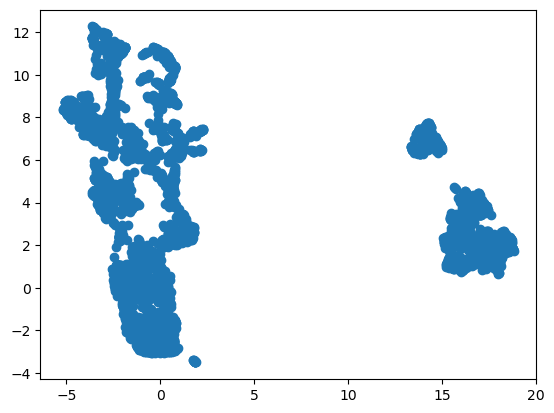

In [53]:

embedding_rf = UMAP(
  n_components=2,
  n_neighbors=10,
  metric="precomputed",
  random_state= 500009,
).fit_transform(md)

plt.scatter(embedding_rf[:,0], embedding_rf[:,1])

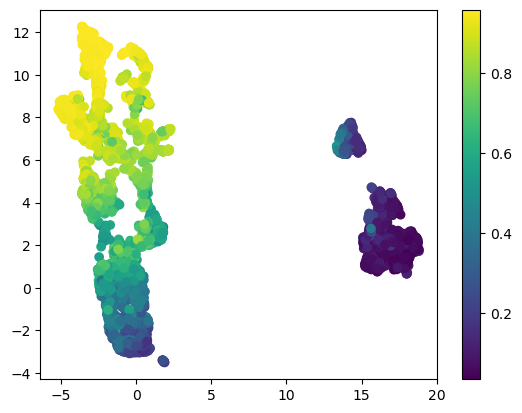

In [54]:

class_index = np.where(model.classes_ == 1)[0]
prob_baja = model.predict_proba(Xtrain_rf_imp)[:,class_index]

plt.scatter(embedding_rf[:,0], embedding_rf[:,1], c=prob_baja)
plt.colorbar()
plt.show()

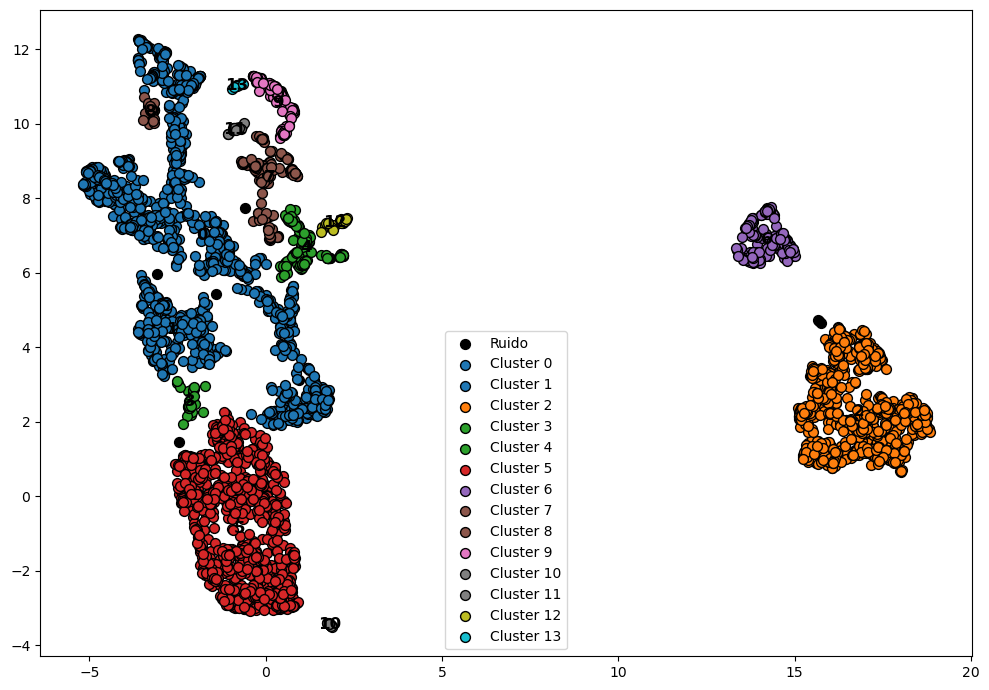

In [55]:

# Asumiendo que embedding_rf ya está definido
hdb = DBSCAN(eps=0.33)
y = hdb.fit(embedding_rf)

labels_unique = np.unique(y.labels_)
colors = plt.get_cmap('tab10')(np.linspace(0, 1, len(labels_unique)))

plt.figure(figsize=(10, 7))
for label in labels_unique:
    if label == -1:
        color = 'k'
        label_name = 'Ruido'
    else:
        color = colors[label % len(colors)]
        label_name = f'Cluster {label}'
    cluster_points = embedding_rf[y.labels_ == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                color=color, label=label_name, edgecolor='k', s=50)
    
    # Calcular las coordenadas medias del clúster y colocar el texto
    if label != -1:
        centroid = cluster_points.mean(axis=0)
        plt.text(centroid[0], centroid[1], str(label), fontsize=12, 
                 weight='bold', color='black', ha='center', va='center')

plt.legend()
plt.tight_layout()
plt.show()


# 1 = Naraja / 3 = Marron, 4= rosa, 5 = amarillo, 0 = celeste,

#### Análisis de los clusters

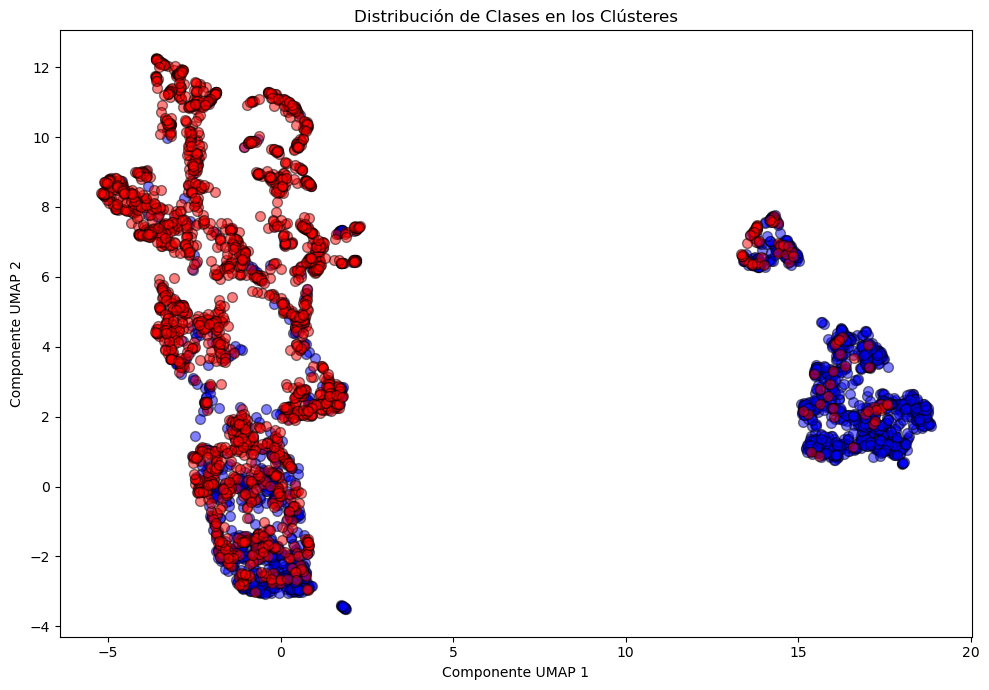

In [56]:

# Crear un mapa de colores para las clases
class_colors = {0: 'blue', 1: 'red'}
class_names = {0: 'CONTINUA', 1: 'BAJA'}

plt.figure(figsize=(10, 7))

# Obtener etiquetas de clúster únicas
labels_unique = np.unique(y.labels_)
colors = plt.get_cmap('tab10')(np.linspace(0, 1, len(labels_unique)))

for label in labels_unique:
    # Indices de los puntos en este clúster
    idx = y.labels_ == label
    # Obtener las etiquetas de clase de estos puntos
    classes_in_cluster = ytrain_rf.values[idx]
    # Colorear puntos según su clase
    for class_value in [0, 1]:
        idx_class = idx & (ytrain_rf.values == class_value)
        if np.any(idx_class):
            plt.scatter(
                embedding_rf[idx_class, 0],
                embedding_rf[idx_class, 1],
                color=class_colors[class_value],
                label=f'Clúster {label}, {class_names[class_value]}',
                edgecolor='k',
                s=50,
                alpha=0.5
            )

# Eliminar duplicados en la leyenda

plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.title('Distribución de Clases en los Clústeres')
plt.tight_layout()
plt.show()

In [57]:
pd.Series(y.labels_).value_counts()

 0     1093
 5     1053
 2      964
 1      279
 6      212
 4      151
 7      138
 9      123
 12      41
 3       34
 8       30
 11      27
 10      15
-1        8
 13       8
Name: count, dtype: int64

In [58]:
# clusters_importantes
#  0     1093
#   1      279
#  4      151
#  7      138
#  8       30
#  9      123
#  13       8



In [59]:

df_embedding = pd.DataFrame(embedding_rf, columns=['embedding_1', 'embedding_2'])
df_embedding['cluster'] = y.labels_

clusters = df_embedding['cluster'].unique()

important_features_by_cluster = {}

for cluster in clusters:
  y_binary = (df_embedding['cluster'] == cluster).astype(int)

  model = RandomForestClassifier(random_state=500009)
  model.fit(Xtrain_rf_imp, y_binary)

  importances = model.feature_importances_
  feature_names = Xtrain_rf.columns

  indices = np.argsort(importances)[::-1]
  important_features_by_cluster[cluster] = [feature_names[i] for i in indices]

In [60]:
for cluster, features in important_features_by_cluster.items():
  print(f"Cluster {cluster} vs. Resto:")
  for feature in features[:8]:
    print(f"  - {feature}")
    

Cluster 0 vs. Resto:
  - t_saldo_total
  - mcomisiones
  - mcomisiones_otras
  - mtarjeta_visa_consumo
  - lag_consumo_total2
  - mrentabilidad
  - Visa_msaldototal
  - ctarjeta_visa_transacciones
Cluster 1 vs. Resto:
  - ctrx_quarter_dd
  - ctrx_quarter
  - mtarjeta_visa_consumo
  - ctarjeta_visa_transacciones
  - t_saldo_total
  - lag_ctrx_quarter1
  - lag_ctrx_quarter2
  - Visa_msaldopesos
Cluster 2 vs. Resto:
  - mpayroll
  - mpayroll_dd
  - cpayroll_trx
  - lag_mpayroll1
  - lag_mpayroll2
  - t_saldo_total
  - mcomisiones_mantenimiento
  - mtarjeta_visa_consumo
Cluster 3 vs. Resto:
  - intensidad_gasto_dd
  - intensidad_gasto
  - ctrx_quarter_dd
  - ctrx_quarter
  - Visa_msaldototal
  - mcuentas_saldo
  - mtarjeta_visa_consumo
  - lag_ctrx_quarter1
Cluster 4 vs. Resto:
  - mrentabilidad
  - mcuentas_saldo
  - mcomisiones
  - mcomisiones_otras
  - Visa_msaldototal
  - lag_ctrx_quarter1
  - mpasivos_margen
  - ctrx_quarter
Cluster 5 vs. Resto:
  - mpayroll
  - cpayroll_trx
  - lag_m

In [61]:
# Crear DataFrame final
Xtrain_rf_imp_df = pd.DataFrame(
    Xtrain_rf_imp,
    index=Xtrain_rf.index,
    columns=Xtrain_rf.columns
)



df_clustered = Xtrain_rf_imp_df.copy()
df_clustered['class_label'] = ytrain_rf
df_clustered['cluster'] = y.labels_

In [62]:
df_clustered.shape

(4176, 181)

In [63]:
# clusters_importantes
#  0     1093
#   1      279
#  4      151
#  7      138
#  8       30
#  9      123
#  13       8


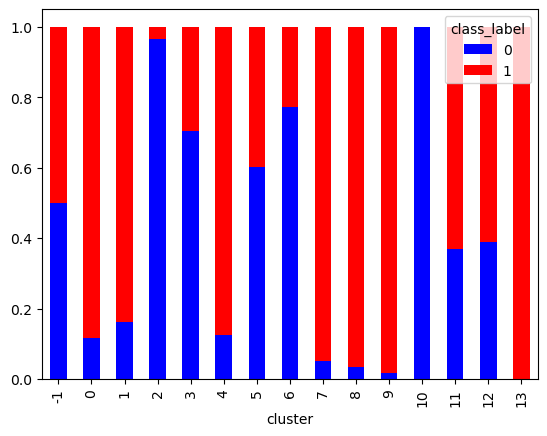

In [64]:
df_clustered.groupby('cluster')['class_label'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, color=['blue', 'red'])
clusters_importantes = ['0,1,4,7,8,9,13']


In [65]:
# clusters_importantes
#  0     1093
#   1      279
#  4      151
#  7      138
#  8       30
#  9      123
#  13       8

In [66]:
# Cluster 0 vs. Resto:
#   - t_saldo_total
#   - mcomisiones
#   - mcomisiones_otras
#   - mtarjeta_visa_consumo
#   - lag_consumo_total2
#   - mrentabilidad
#   - Visa_msaldototal
#   - ctarjeta_visa_transacciones
# Cluster 1 vs. Resto:
#   - ctrx_quarter_dd
#   - ctrx_quarter
#   - mtarjeta_visa_consumo
#   - ctarjeta_visa_transacciones
#   - t_saldo_total
#   - lag_ctrx_quarter1
#   - lag_ctrx_quarter2
#   - Visa_msaldopesos
# Cluster 4 vs. Resto:
#   - mrentabilidad
#   - mcuentas_saldo
#   - mcomisiones
#   - mcomisiones_otras
#   - Visa_msaldototal
#   - lag_ctrx_quarter1
#   - mpasivos_margen
#   - ctrx_quarter
# Cluster 5 vs. Resto: mayoria de continua
#   - mpayroll
#   - cpayroll_trx
#   - lag_mpayroll1
#   - mpayroll_dd
#   - ctrx_quarter_dd
#   - ctrx_quarter
#   - lag_ctrx_quarter1
#   - ctarjeta_visa_transacciones
# Cluster 7 vs. Resto:
#   - mactivos_margen
#   - mpasivos_margen
#   - mactivos_margen_dd
#   - t_saldo_total
#   - Visa_status
#   - mrentabilidad
#   - Visa_mpagominimo
#   - ctrx_quarter

# Cluster 9 vs. Resto:
#   - mcomisiones
#   - mcomisiones_otras
#   - ccomisiones_otras
#   - mcuenta_corriente
#   - mcuentas_saldo
#   - mcomisiones_mantenimiento
#   - mcaja_ahorro
#   - intensidad_gasto_dd

# Cluster 8 vs. Resto:
#   - intensidad_gasto_dd
#   - intensidad_gasto
#   - mcomisiones
#   - mcomisiones_otras
#   - cproductos_dd
#   - lag_ctrx_quarter1
#   - delta_2_lag_consumo_total
#   - mactivos_margen

# Cluster 13 vs. Resto:
#   - mcomisiones
#   - mcomisiones_otras
#   - ctrx_quarter_dd
#   - maximo_valor_columna
#   - mcomisiones_mantenimiento
#   - intensidad_gasto_dd
#   - mactivos_margen
#   - cliente_antiguedad


In [67]:
df_clustered.shape

(4176, 181)

In [68]:
print(df_clustered['cluster'].value_counts())


cluster
 0     1093
 5     1053
 2      964
 1      279
 6      212
 4      151
 7      138
 9      123
 12      41
 3       34
 8       30
 11      27
 10      15
-1        8
 13       8
Name: count, dtype: int64


In [69]:
df_clustered.columns

Index(['numero_de_cliente', 'active_quarter', 'cliente_vip', 'internet',
       'cliente_edad', 'cliente_antiguedad', 'mrentabilidad',
       'mrentabilidad_annual', 'mcomisiones', 'mactivos_margen',
       ...
       'cliente_edad_dd', 'ctrx_quarter_dd', 'mactivos_margen_dd',
       'mpayroll_dd', 'intensidad_gasto_dd', 'cproductos_dd',
       'maximo_valor_columna', 'days_since_primer_registro', 'class_label',
       'cluster'],
      dtype='object', length=181)

In [70]:
# df_clustered.to_excel(r"C:\Users\Admin\Documents\1_Notebook\1_Estudio\1 UBA Maestría DS\1_Especialización\1_Segundo Semestre\DMEyF\Git\dmeyf2024\datasets\competencia_01_df_clustered.xlsx", index=False)

##### Cluster 0 - t_saldo_total  

c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\seaborn\axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


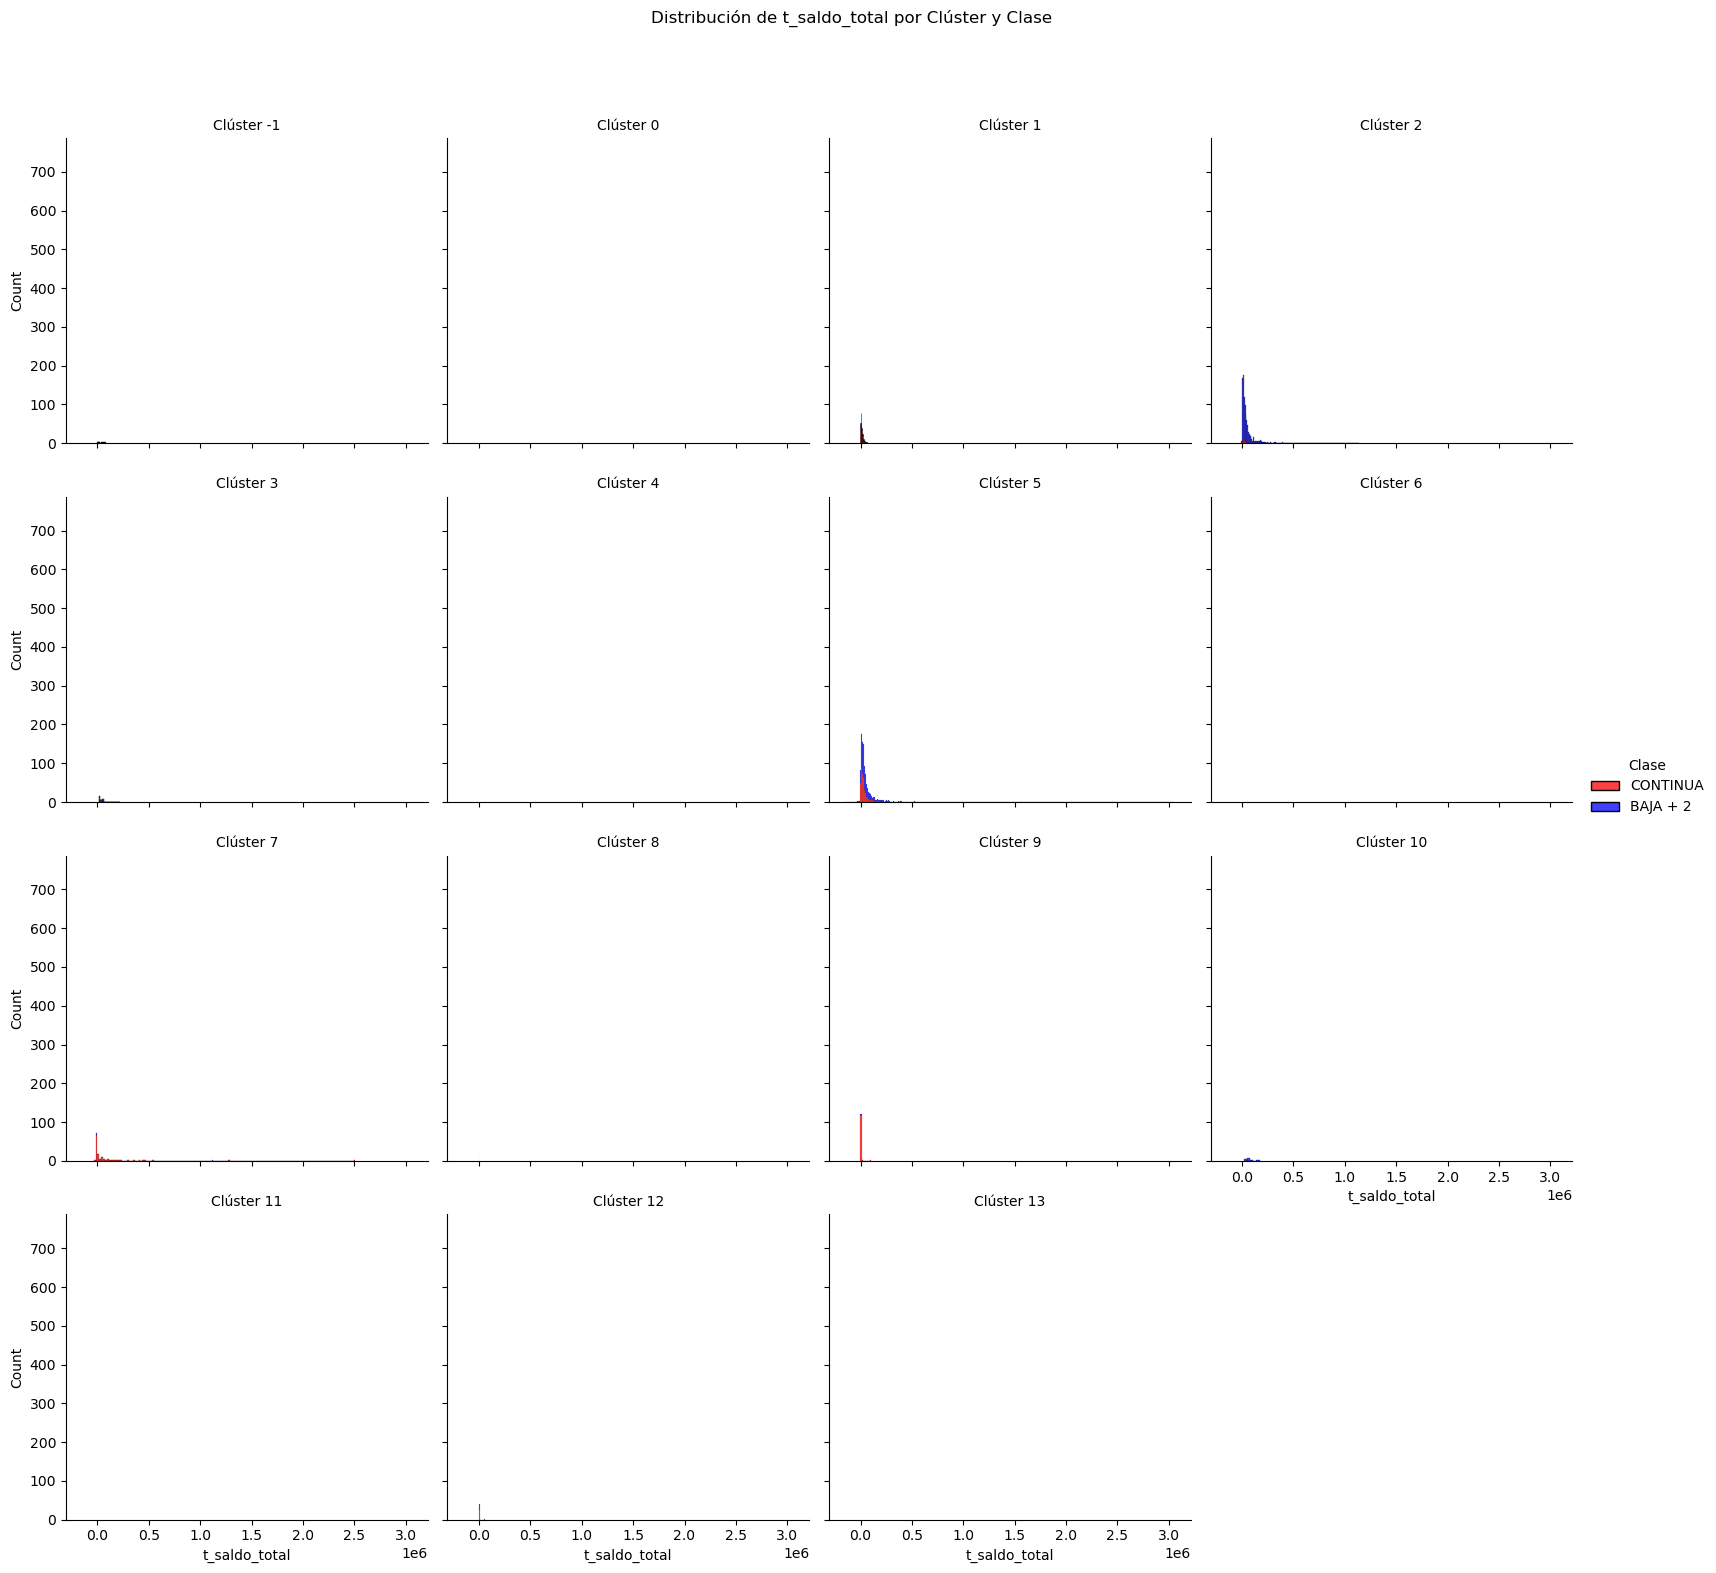

c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\seaborn\axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


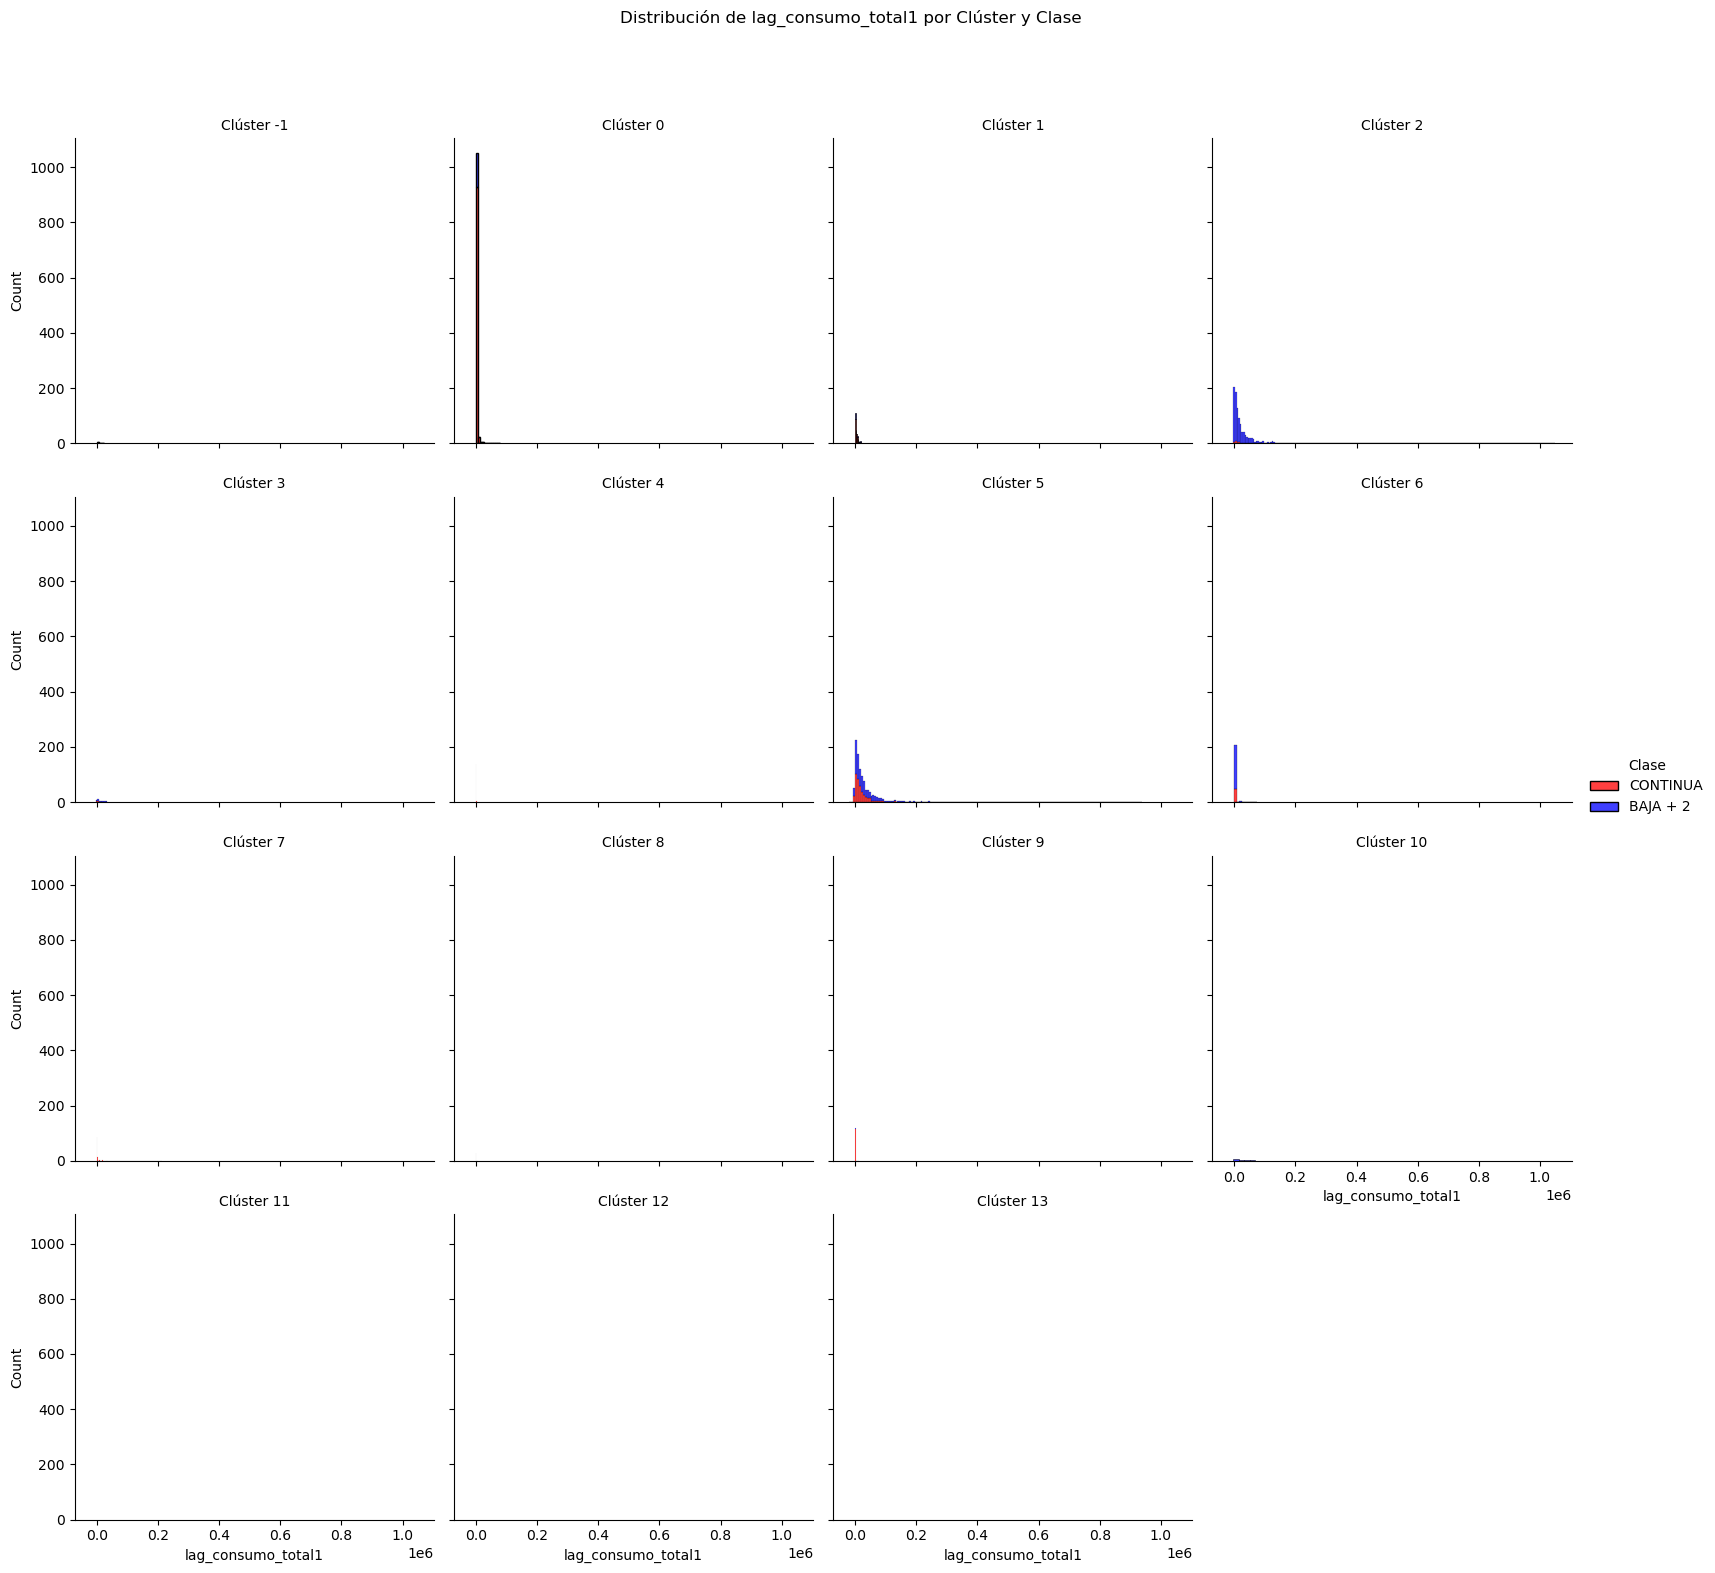

c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\seaborn\axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


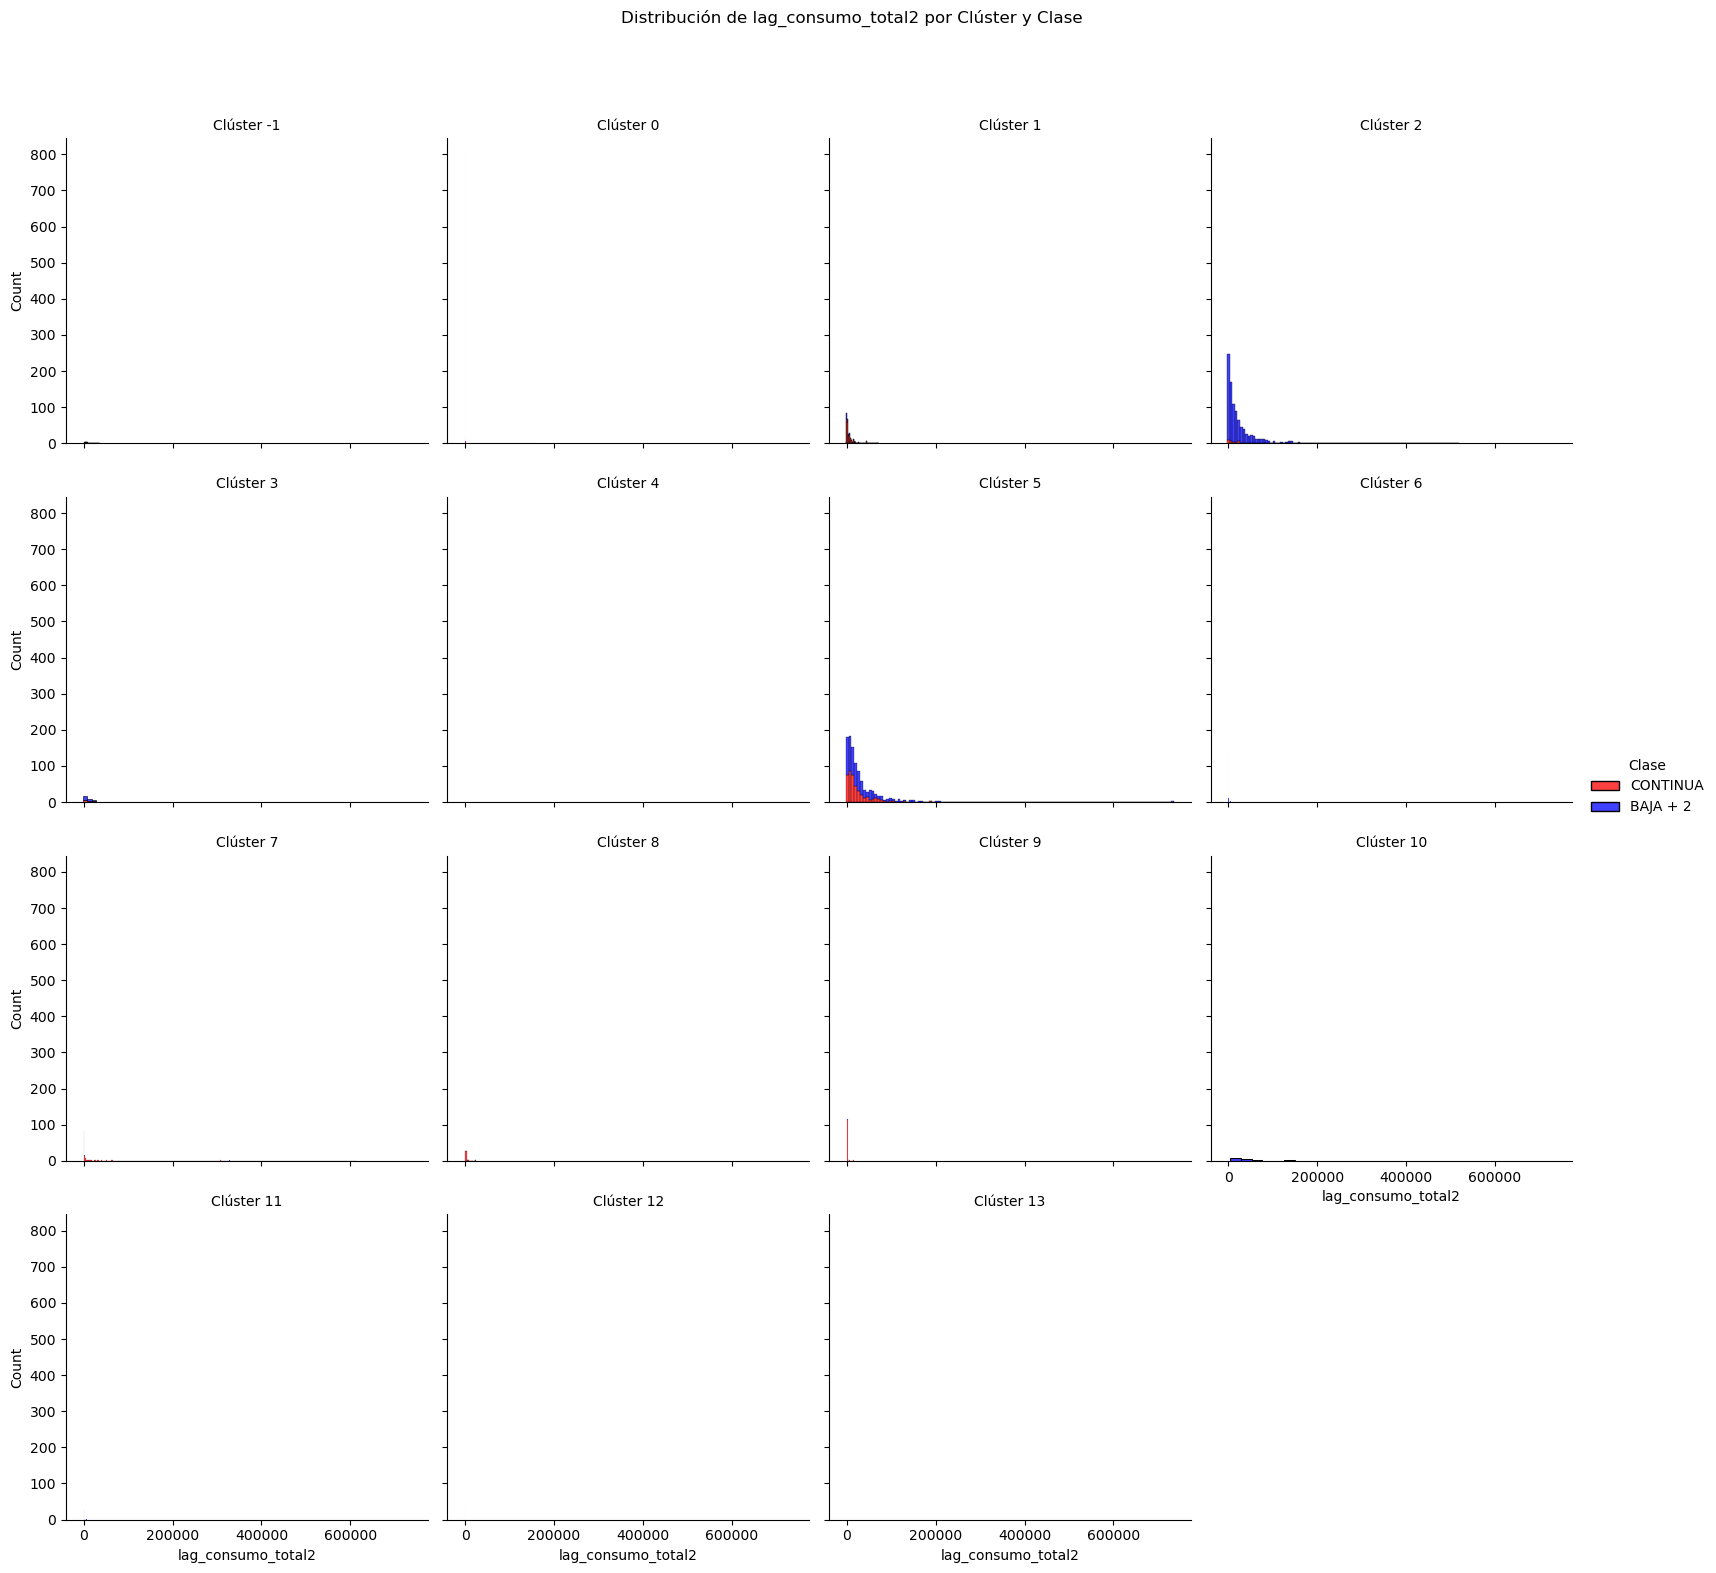

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables a analizar
variables = ['t_saldo_total', 'lag_consumo_total1', 'lag_consumo_total2' ]

for var in variables:
    g = sns.FacetGrid(df_clustered, col='cluster', height=4, col_wrap=4)
    try:
        g.map_dataframe(
            sns.histplot,
            x=var,
            hue='class_label',
            multiple='stack',
            palette={0: 'blue', 1: 'red'}
        )
    except ValueError as e:
        print(f"Error al graficar el clúster {cluster}: {e}")
        continue
    g.add_legend(title='Clase', labels=['CONTINUA', 'BAJA + 2'])
    g.set_titles('Clúster {col_name}')
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Distribución de {var} por Clúster y Clase')
    plt.show()

In [72]:

# Variables a analizar
variables = ['t_saldo_total', 'lag_consumo_total1', 'lag_consumo_total2']

# Obtener los clústeres únicos
clusters = df_clustered['cluster'].unique()

for var in variables:
    # Crear subplots
    fig = make_subplots(rows=1, cols=len(clusters), subplot_titles=[f'Clúster {c}' for c in clusters])

    for i, cluster in enumerate(clusters):
        # Filtrar datos por clúster
        cluster_data = df_clustered[df_clustered['cluster'] == cluster]

        # Crear histograma
        hist = px.histogram(
            cluster_data,
            x=var,
            color='class_label',
            color_discrete_map={0: 'blue', 1: 'red'},
            barmode='stack'
        )

        # Añadir histograma al subplot
        for trace in hist['data']:
            fig.add_trace(trace, row=1, col=i+1)

    # Actualizar el layout
    fig.update_layout(
        title_text=f'Distribución de {var} por Clúster y Clase',
        showlegend=True,
        height=400,
        width=300 * len(clusters)
    )

    # Mostrar el gráfico
    fig.show()

In [73]:
df_clustered['mpayroll']

15499          0.00
15603          0.00
15607          0.00
15842          0.00
15861      21159.07
            ...    
857796         0.00
857845         0.00
857882     26821.81
857888    130347.27
857983         0.00
Name: mpayroll, Length: 4176, dtype: float64

In [83]:
# ctrx_quarter  - mautoservicio  - mpayroll  - mtransferencias_emitidas  - ctarjeta_debito_transacciones

# Agrupar por 'cluster' y calcular la media de las columnas especificadas
df_agg = df_clustered.groupby('cluster').agg(
    
    cliente_edad = ('cliente_edad', 'mean'),
    ctrx_quarter = ('ctrx_quarter', 'mean'),
    Saldo_tarjeta_antes_baja=('t_saldo_total', 'mean'),
    consumo_total_mes_anterior=('lag_consumo_total1', 'mean'),
    consumo_total_mes_anterior2=('lag_consumo_total2', 'mean'), 
    Sueldo_max=('mpayroll', 'max'),
    Sueldo_mean=('mpayroll', 'mean'),
    Sueldo_max_mes_anterior=('lag_mpayroll1', 'mean'),
    Sueldo_max_mes_2_anteriores=('lag_mpayroll2', 'mean'),
    Internet = ('internet', 'mean'),
    cmobile_app_trx = ('cmobile_app_trx', 'mean'),
    Debito = ('mautoservicio', 'mean'),
    cpagodeservicios = ('cpagodeservicios','mean'),
    cextraccion_autoservicio = ('cextraccion_autoservicio','mean'),
    ccheques_emitidos = ('ccheques_emitidos','mean'),
    Master_mconsumototal = ('Master_mconsumototal','mean'),
    Master_mlimitecompra = ('Master_mlimitecompra','mean'),
).reset_index()

# Aplicar el gradiente de fondo de rojo a blanco
df_agg_styled = df_agg.style.background_gradient(cmap='Reds')

# Mostrar el DataFrame con el gradiente de fondo
df_agg_styled

In [75]:
df_train['cmobile_app_trx'].mean()

0.7174814093646698

In [76]:
df_cluster_1 = df_clustered[(df_clustered['cluster'] == 1) | (df_clustered['cluster'] == 2)]

px.scatter(df_cluster_1, x='t_saldo_total', y='mpayroll', color='cluster', symbol='class_label', opacity=0.3, title='Distribución de Saldo y Consumo por Clúster y Clase')

In [77]:
df_clustered.columns

Index(['numero_de_cliente', 'active_quarter', 'cliente_vip', 'internet',
       'cliente_edad', 'cliente_antiguedad', 'mrentabilidad',
       'mrentabilidad_annual', 'mcomisiones', 'mactivos_margen',
       ...
       'cliente_edad_dd', 'ctrx_quarter_dd', 'mactivos_margen_dd',
       'mpayroll_dd', 'intensidad_gasto_dd', 'cproductos_dd',
       'maximo_valor_columna', 'days_since_primer_registro', 'class_label',
       'cluster'],
      dtype='object', length=181)

##### Cluster 1 - ctrx quarter

In [90]:
df_cluster_5.columns.values

array(['numero_de_cliente', 'active_quarter', 'cliente_vip', 'internet',
       'cliente_edad', 'cliente_antiguedad', 'mrentabilidad',
       'mrentabilidad_annual', 'mcomisiones', 'mactivos_margen',
       'mpasivos_margen', 'cproductos', 'tcuentas', 'ccuenta_corriente',
       'mcuenta_corriente_adicional', 'mcuenta_corriente', 'ccaja_ahorro',
       'mcaja_ahorro', 'mcaja_ahorro_adicional', 'mcaja_ahorro_dolares',
       'cdescubierto_preacordado', 'mcuentas_saldo', 'ctarjeta_debito',
       'ctarjeta_debito_transacciones', 'mautoservicio', 'ctarjeta_visa',
       'ctarjeta_visa_transacciones', 'mtarjeta_visa_consumo',
       'ctarjeta_master', 'ctarjeta_master_transacciones',
       'mtarjeta_master_consumo', 'cprestamos_personales',
       'mprestamos_personales', 'cprestamos_prendarios',
       'mprestamos_prendarios', 'cprestamos_hipotecarios',
       'mprestamos_hipotecarios', 'cplazo_fijo', 'mplazo_fijo_dolares',
       'mplazo_fijo_pesos', 'cinversion1', 'minversion1_pesos',


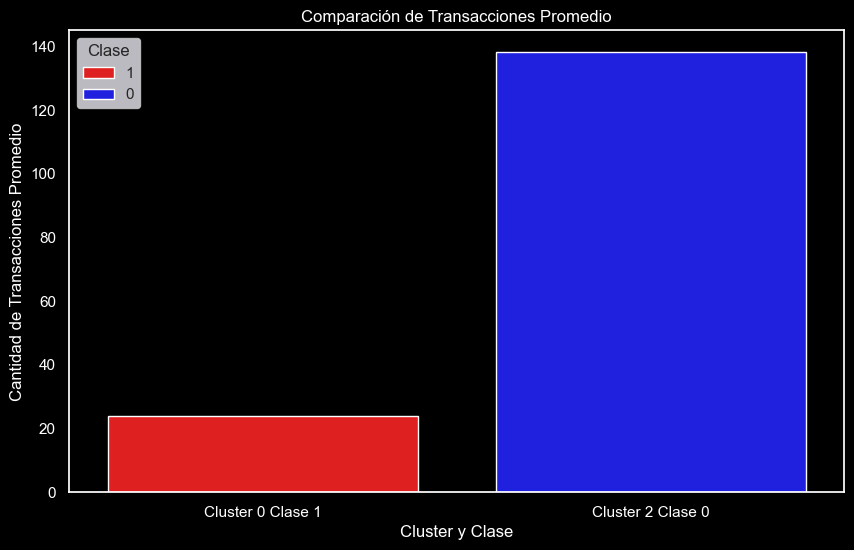

In [109]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Filtrar el DataFrame para obtener los datos necesarios
df_cluster_0_class_1 = df_clustered[(df_clustered['cluster'] == 0) & (df_clustered['class_label'] == 1)]
df_cluster_2_class_0 = df_clustered[(df_clustered['cluster'] == 2) & (df_clustered['class_label'] == 0)]

# Calcular la cantidad de transacciones promedio
mean_trans_cluster_0_class_1 = df_cluster_0_class_1['ctrx_quarter'].mean()
mean_trans_cluster_2_class_0 = df_cluster_2_class_0['ctrx_quarter'].mean()

# Crear un DataFrame para el gráfico
data = {
    'Cluster y Clase': ['Cluster 0 Clase 1', 'Cluster 2 Clase 0'],
    'Cantidad de Transacciones Promedio': [mean_trans_cluster_0_class_1, mean_trans_cluster_2_class_0],
    'Clase': ['1', '0']  # Añadir una columna para la clase
}
df_plot = pd.DataFrame(data)

# Configurar el estilo de Seaborn
sns.set(style="dark")

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Gráfico de barras
ax = sns.barplot(
    x='Cluster y Clase', 
    y='Cantidad de Transacciones Promedio', 
    data=df_plot,
    palette={'1': 'red', '0': 'blue'},  # Asignar colores a las clases
    hue='Clase'  # Usar la columna 'Clase' para asignar los colores
)

# Ajustar el color de las etiquetas y el título
ax.set_title('Comparación de Transacciones Promedio', color='white')
ax.set_xlabel('Cluster y Clase', color='white')
ax.set_ylabel('Cantidad de Transacciones Promedio', color='white')
ax.tick_params(colors='white')

# Cambiar el color del fondo de la figura y del eje
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# Mostrar el gráfico
plt.show()

c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\seaborn\axisgrid.py:186: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



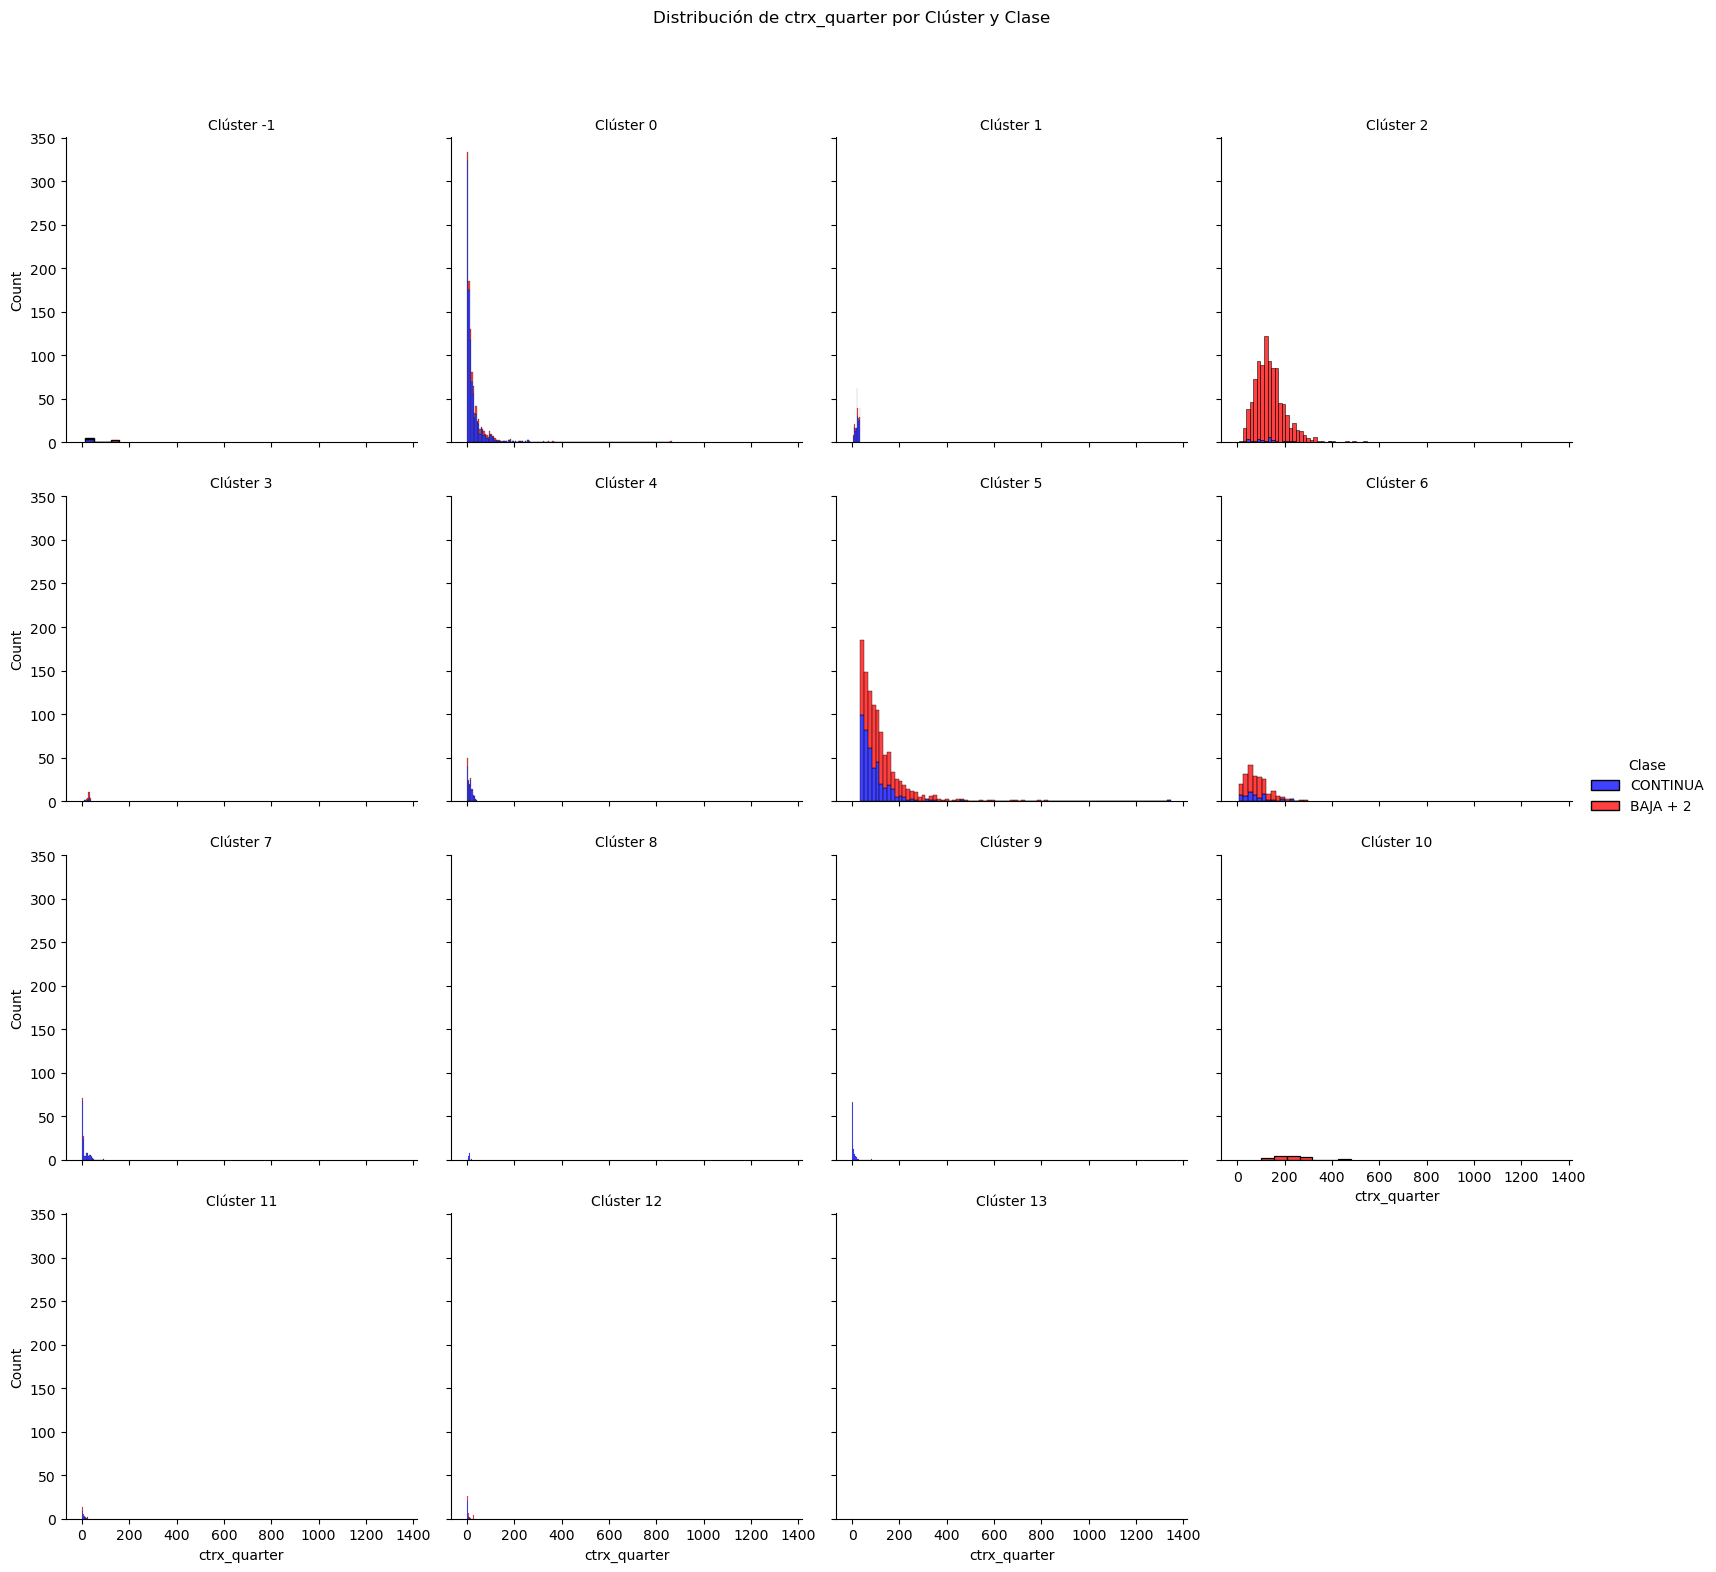

c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\seaborn\axisgrid.py:186: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



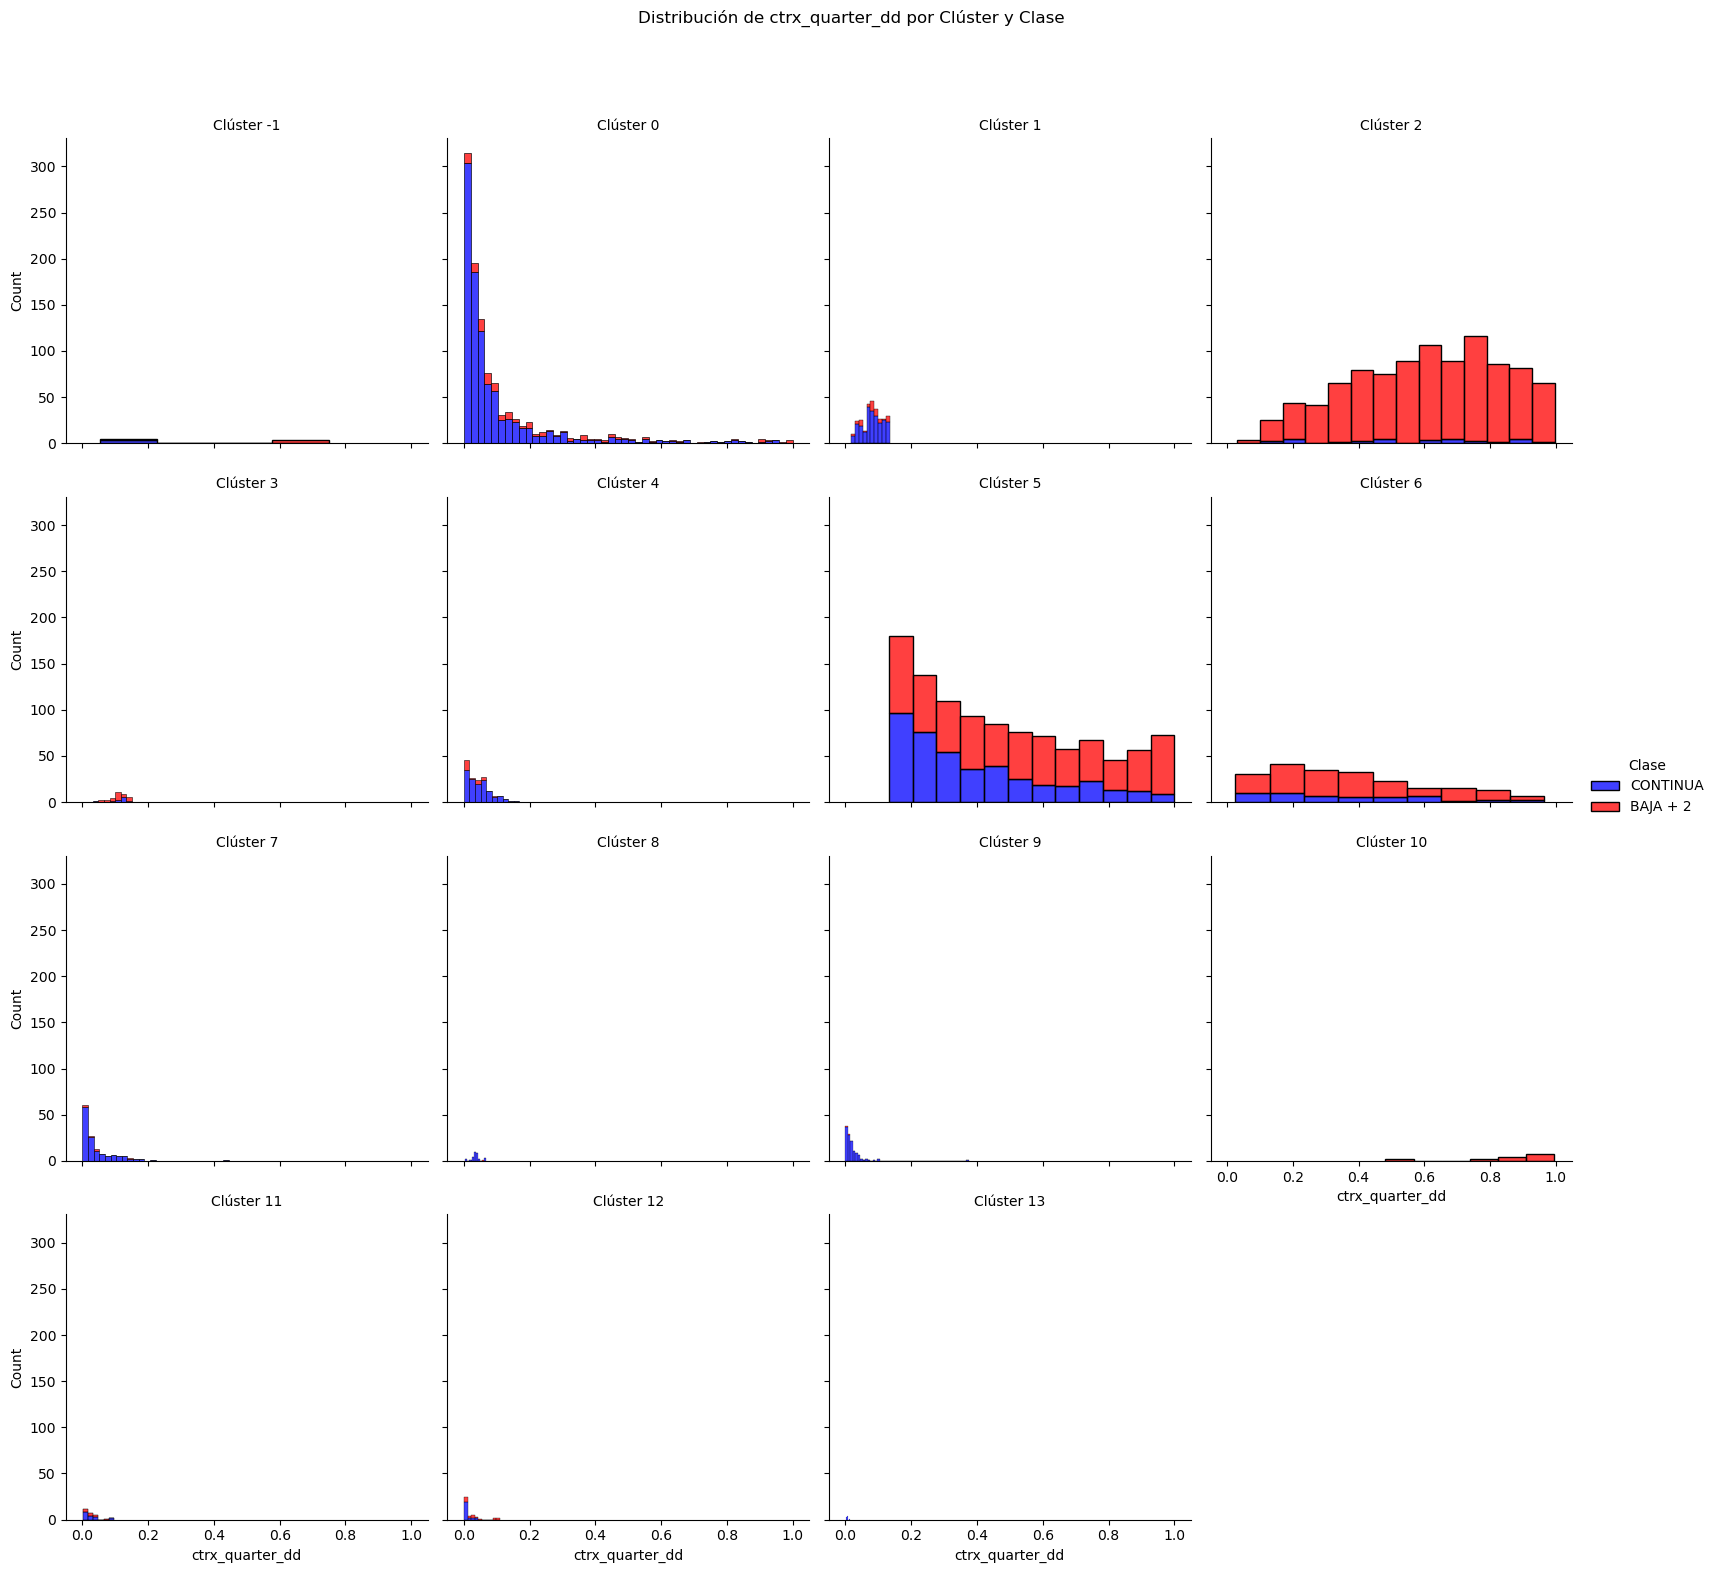

c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\seaborn\axisgrid.py:186: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



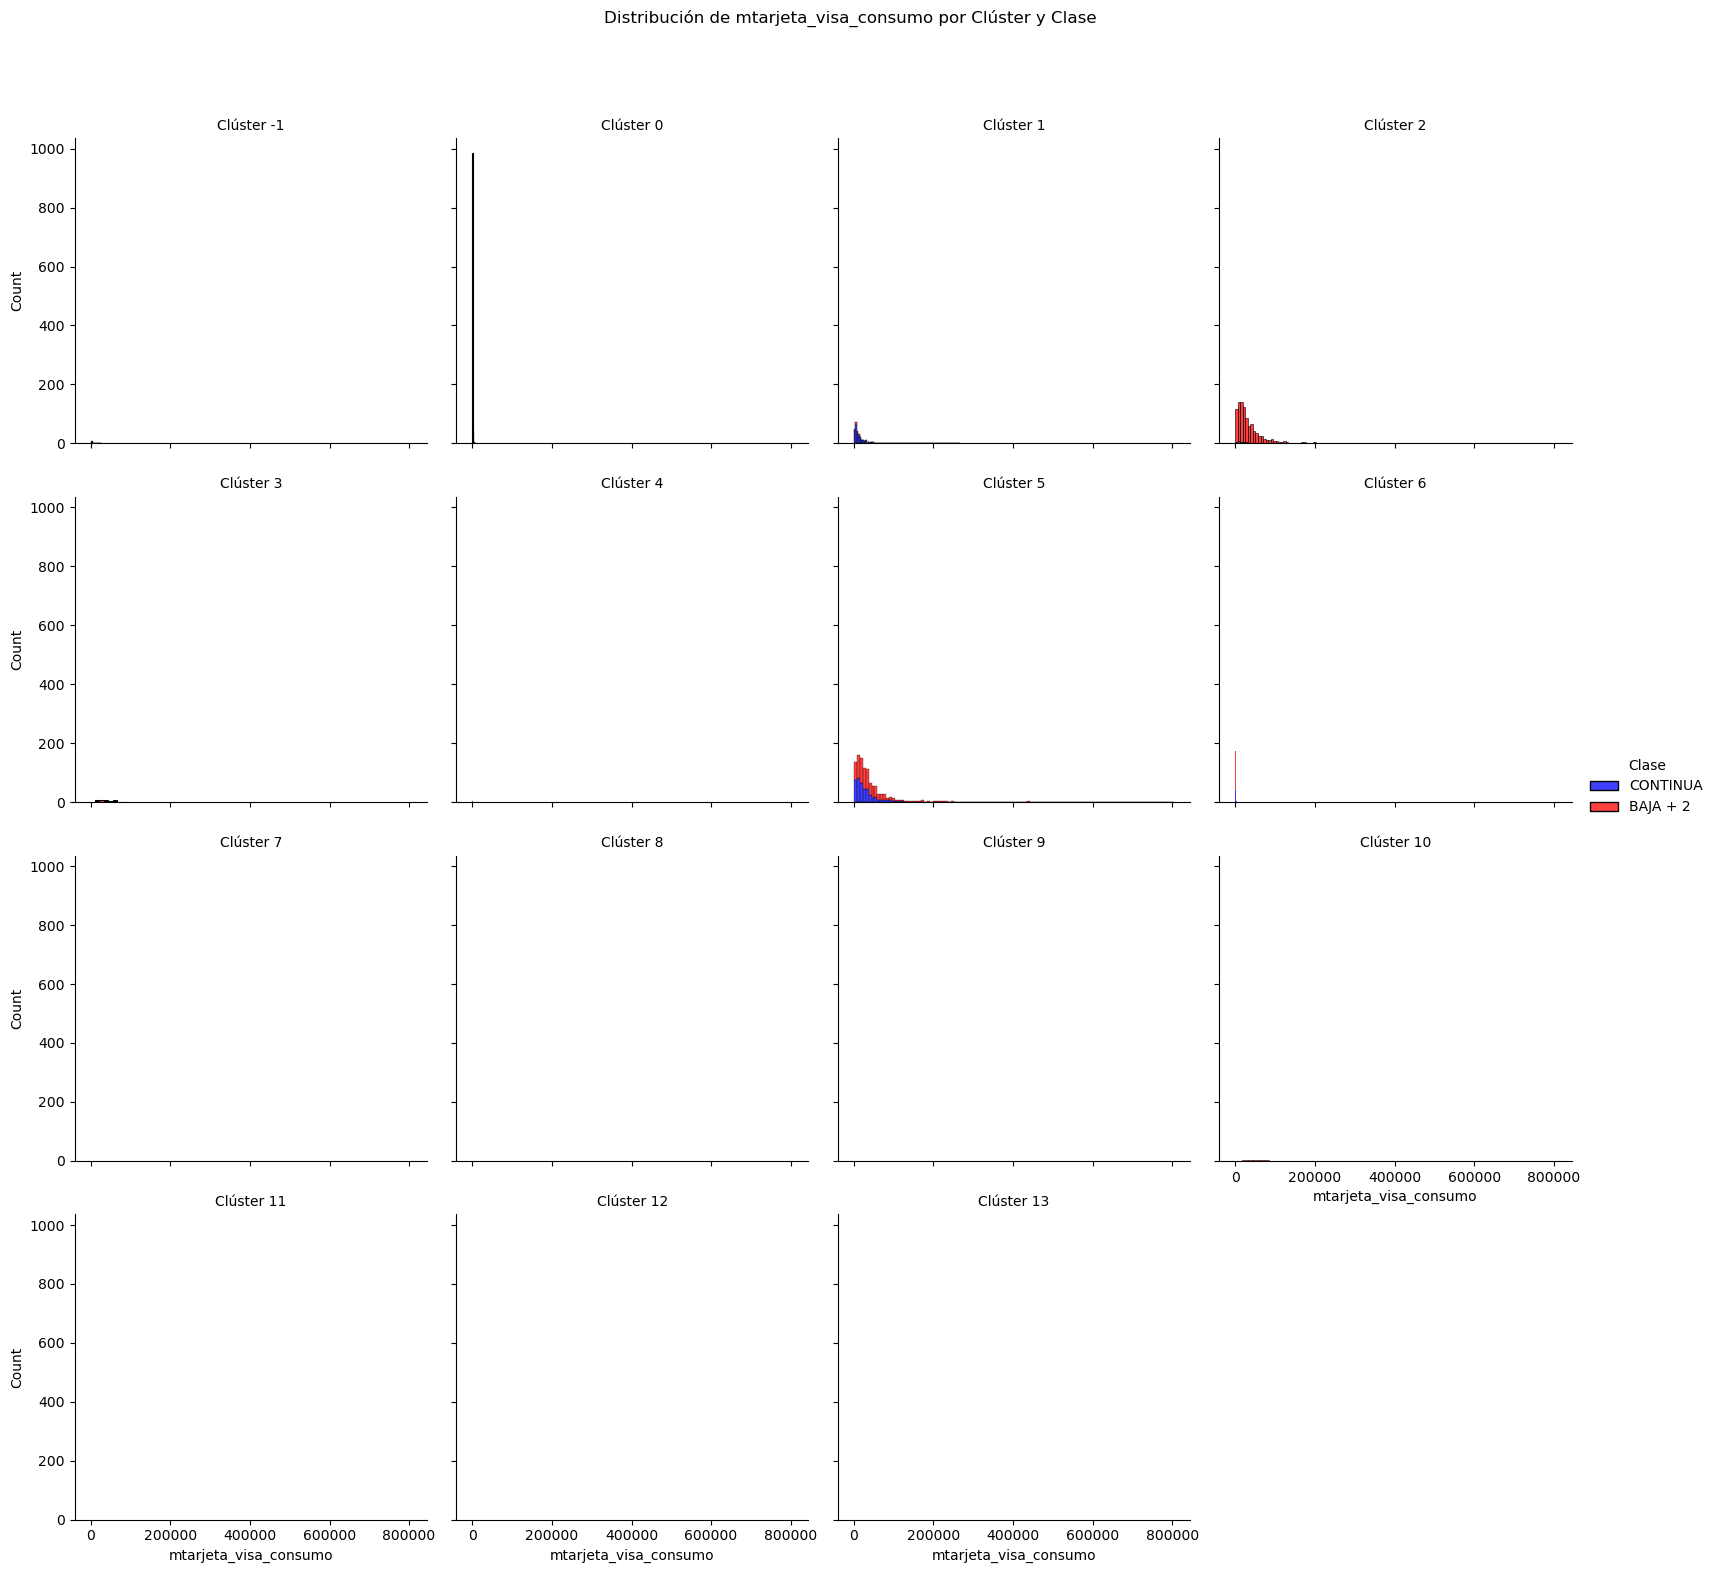

c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\seaborn\axisgrid.py:186: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



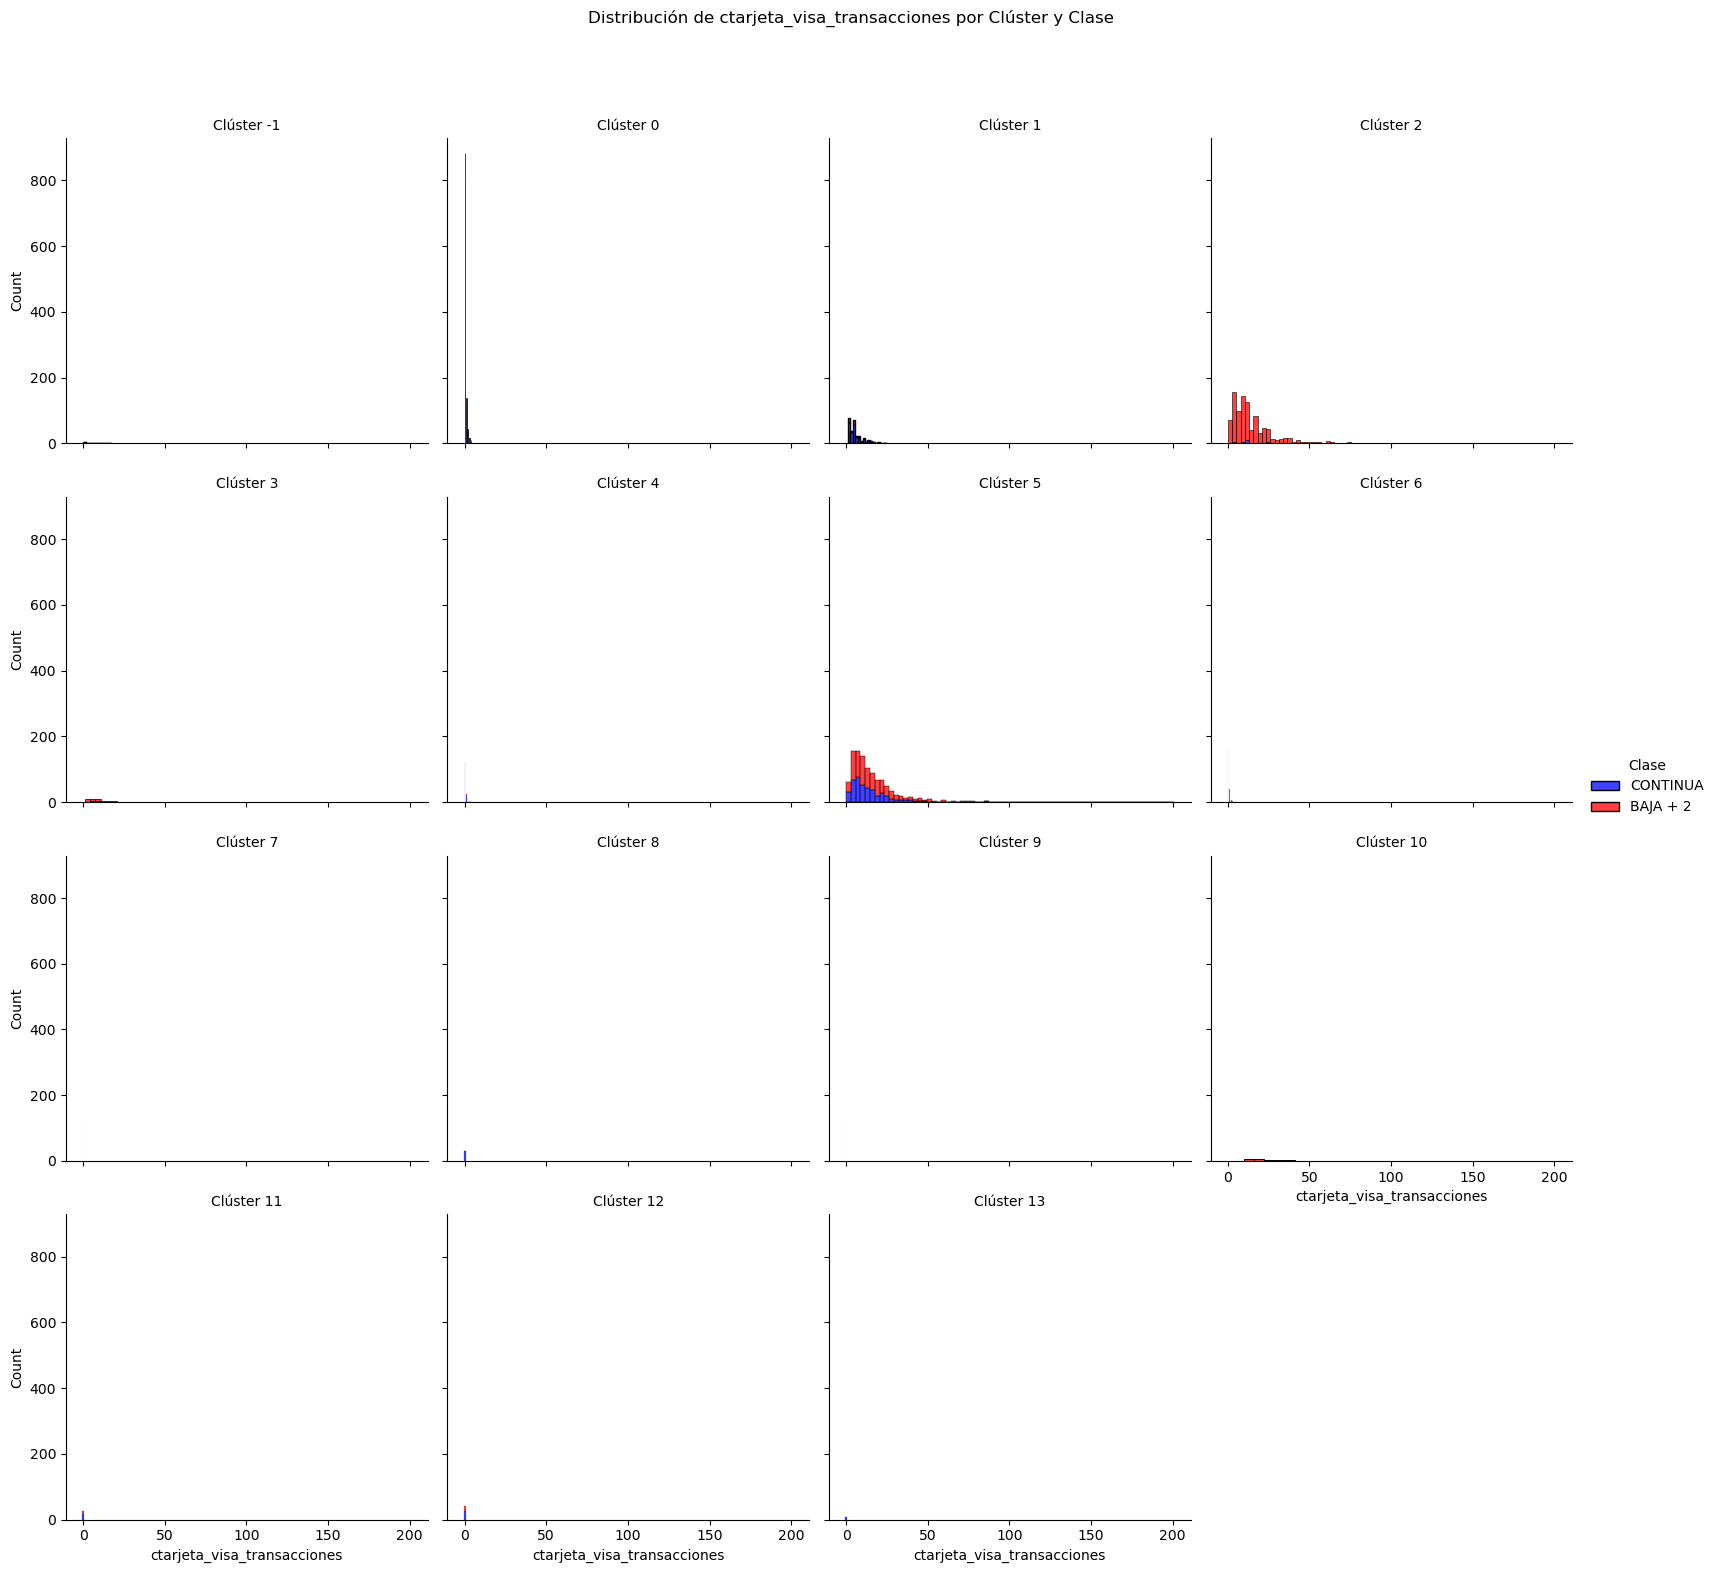

In [78]:

variables = ['ctrx_quarter', 'ctrx_quarter_dd', 'mtarjeta_visa_consumo', 'ctarjeta_visa_transacciones' ]

for var in variables:
    g = sns.FacetGrid(df_clustered, col='cluster', height=4, col_wrap=4)
    try:
        g.map_dataframe(
            sns.histplot,
            x=var,
            hue='class_label',
            multiple='stack',
            palette={0: 'red', 1: 'blue'}
        )
    except ValueError as e:
        print(f"Error al graficar el clúster {cluster}: {e}")
        continue
    g.add_legend(title='Clase', labels=['CONTINUA', 'BAJA + 2'])
    g.set_titles('Clúster {col_name}')
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Distribución de {var} por Clúster y Clase')
    plt.show()

In [79]:

# Variables a analizar
variables = ['ctrx_quarter', 'ctrx_quarter_dd', 'mtarjeta_visa_consumo', 'ctarjeta_visa_transacciones' ]

# Obtener los clústeres únicos
clusters = df_clustered['cluster'].unique()

for var in variables:
    # Crear subplots
    fig = make_subplots(rows=1, cols=len(clusters), subplot_titles=[f'Clúster {c}' for c in clusters])

    for i, cluster in enumerate(clusters):
        # Filtrar datos por clúster
        cluster_data = df_clustered[df_clustered['cluster'] == cluster]

        # Crear histograma
        hist = px.histogram(
            cluster_data,
            x=var,
            color='class_label',
            color_discrete_map={0: 'blue', 1: 'red'},
            barmode='stack'
        )

        # Añadir histograma al subplot
        for trace in hist['data']:
            fig.add_trace(trace, row=1, col=i+1)

    # Actualizar el layout
    fig.update_layout(
        title_text=f'Distribución de {var} por Clúster y Clase',
        showlegend=True,
        height=400,
        width=300 * len(clusters)
    )

    # Mostrar el gráfico
    fig.show()

In [80]:
df_clustered['lag_ctrx_quarter1']

15499      32.0
15603      14.0
15607       8.0
15842      21.0
15861      36.0
          ...  
857796      6.0
857845     11.0
857882     41.0
857888    118.0
857983     65.0
Name: lag_ctrx_quarter1, Length: 4176, dtype: float64

In [87]:
# ctrx_quarter  - mautoservicio  - mpayroll  - mtransferencias_emitidas  - ctarjeta_debito_transacciones
variables = ['ctrx_quarter', 'ctrx_quarter_dd', 'mtarjeta_visa_consumo', 'ctarjeta_visa_transacciones' ]
# Agrupar por 'cluster' y calcular la media de las columnas especificadas
df_agg = df_clustered.groupby('cluster').agg(
    cantidad_transacciones=('ctrx_quarter', 'mean'),
    cantidad_transacciones_1=('lag_ctrx_quarter1', 'mean'),
    cantidad_transacciones_2=('lag_ctrx_quarter2', 'mean'), 
    transacciones_tarjeta_visa_promedio=('ctarjeta_visa_transacciones', 'mean'),
    transacciones_tarjeta_master_promedio=('ctarjeta_master_transacciones', 'mean'),
    t_consumo_total = ('t_consumo_total', 'mean'),
    t_consumo_total_1 = ('lag_consumo_total1', 'mean'),
    t_consumo_total_2 = ('lag_consumo_total2', 'mean'),
    Sueldo_max=('mpayroll', 'max'),
    Sueldo_max_mes_anterior=('mtarjeta_visa_consumo', 'max')
      # Asegúrate de que el nombre de la columna sea correcto
).reset_index()

# Aplicar el gradiente de fondo de rojo a blanco
df_agg_styled = df_agg.style.background_gradient(cmap='Reds')

# Mostrar el DataFrame con el gradiente de fondo
df_agg_styled

In [82]:

Cluster 4 vs. Resto:
  - mrentabilidad
  - mcuentas_saldo
  - mcomisiones
  - mcomisiones_otras
  - Visa_msaldototal
  - lag_ctrx_quarter1
  - mpasivos_margen
  - ctrx_quarter

# ctrx_quarter  - mautoservicio  - mpayroll  - mtransferencias_emitidas  - ctarjeta_debito_transacciones
variables = ['ctrx_quarter', 'ctrx_quarter_dd', 'mtarjeta_visa_consumo', 'ctarjeta_visa_transacciones' ]
# Agrupar por 'cluster' y calcular la media de las columnas especificadas
df_agg = df_clustered.groupby('cluster').agg(
    cantidad_transacciones=('ctrx_quarter', 'mean'),
    cantidad_transacciones_1=('lag_ctrx_quarter1', 'mean'),
    cantidad_transacciones_2=('lag_ctrx_quarter2', 'mean'), 
    transacciones_tarjeta_promedio=('ctarjeta_visa_transacciones', 'max'),
    Sueldo_max=('mpayroll', 'max'),
    Sueldo_max_mes_anterior=('mtarjeta_visa_consumo', 'max')
      # Asegúrate de que el nombre de la columna sea correcto
).reset_index()

# Aplicar el gradiente de fondo de rojo a blanco
df_agg_styled = df_agg.style.background_gradient(cmap='Reds')

# Mostrar el DataFrame con el gradiente de fondo
df_agg_styled

SyntaxError: invalid syntax (3287743984.py, line 1)

##### Cluster 4 - mrentabilidad

c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\seaborn\axisgrid.py:186: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



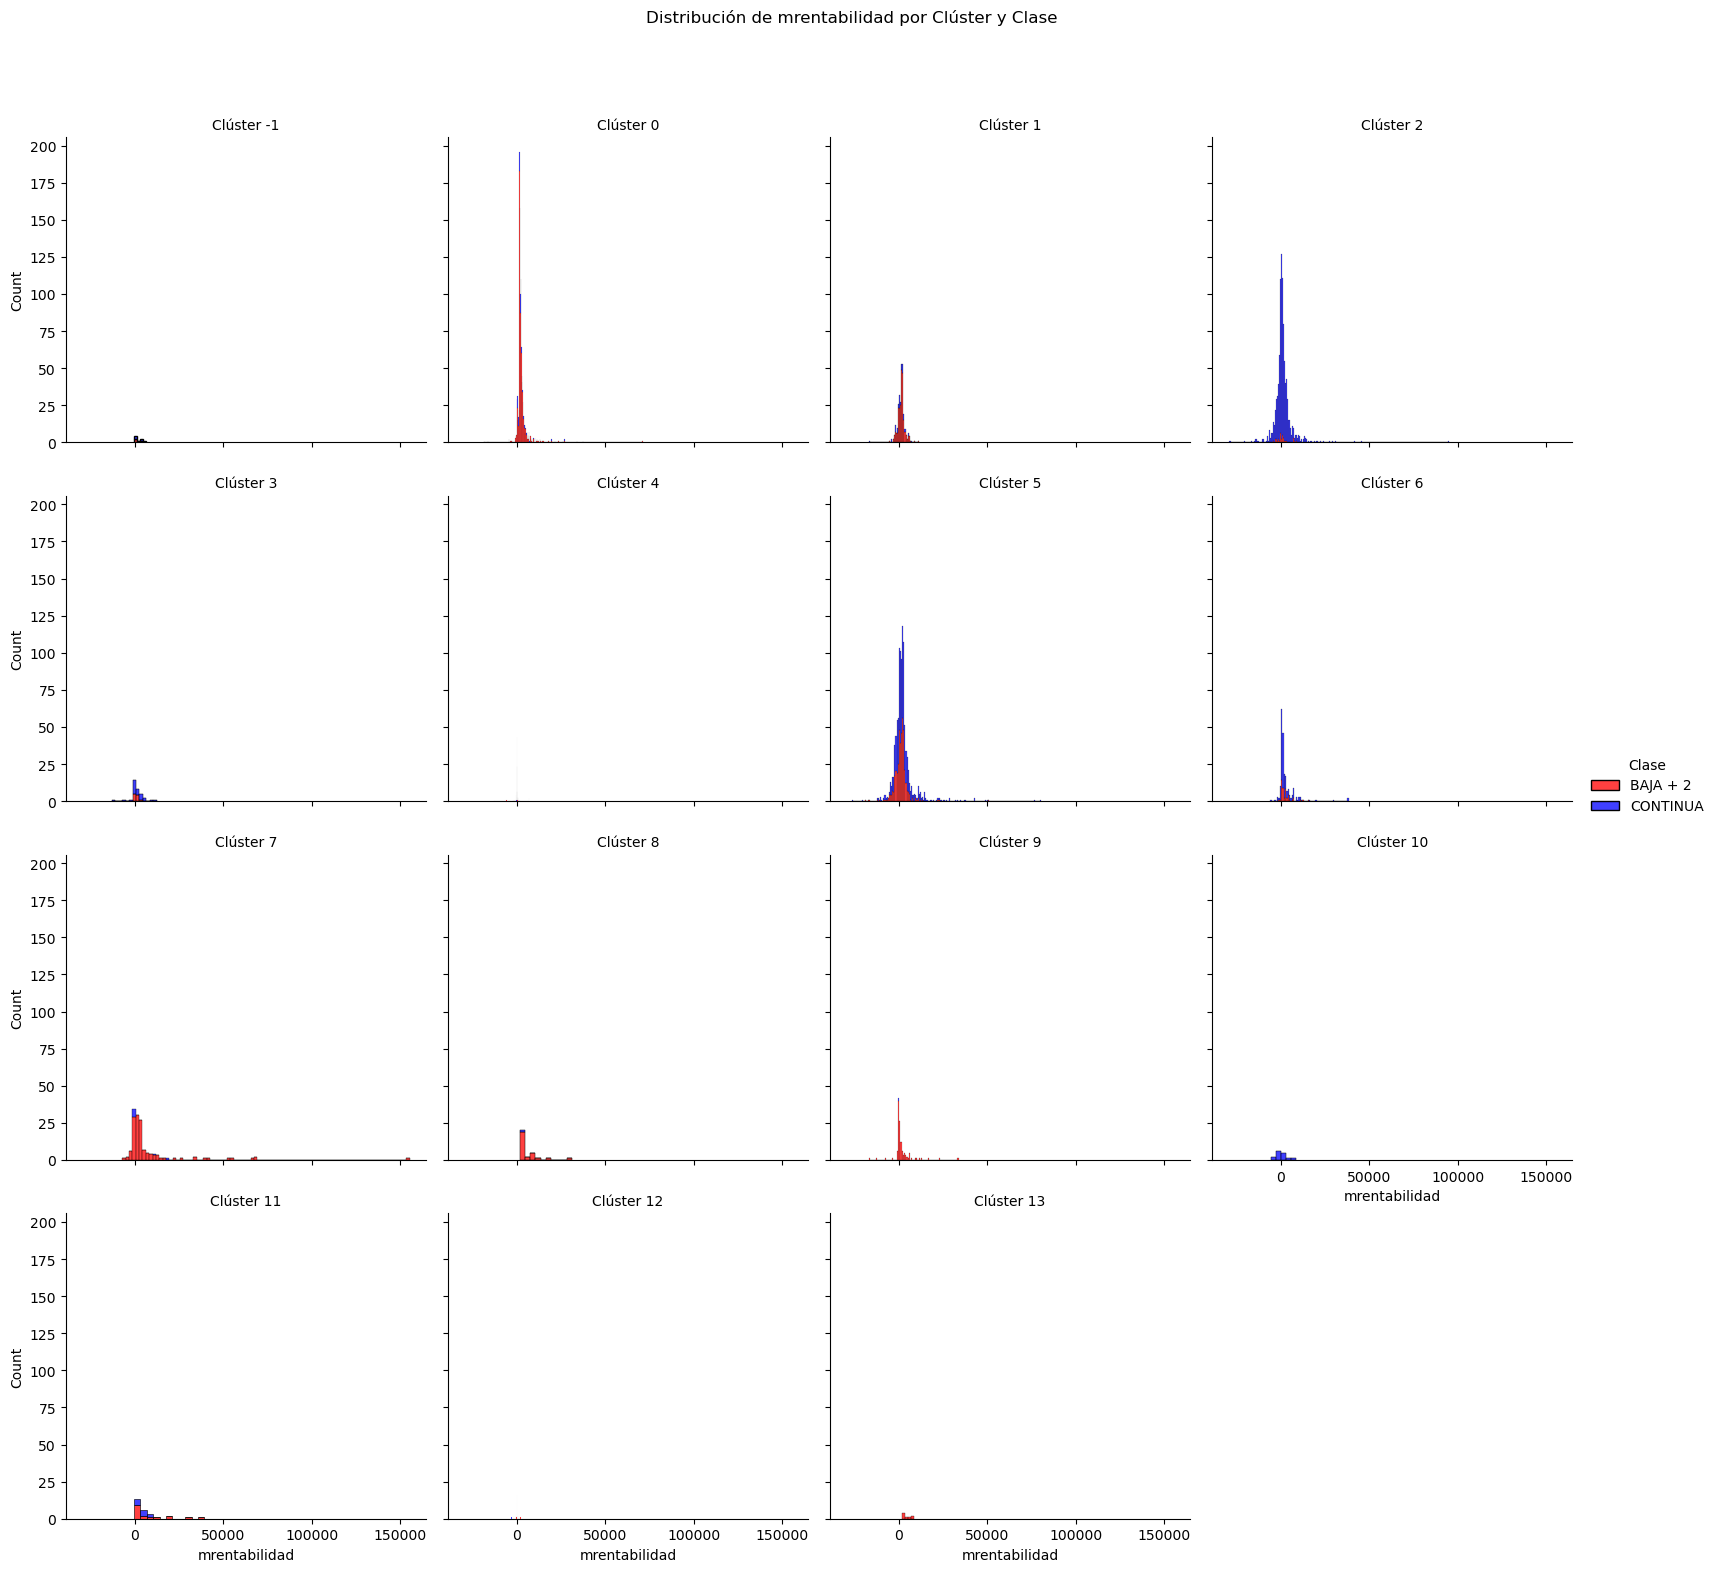

c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\seaborn\axisgrid.py:186: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



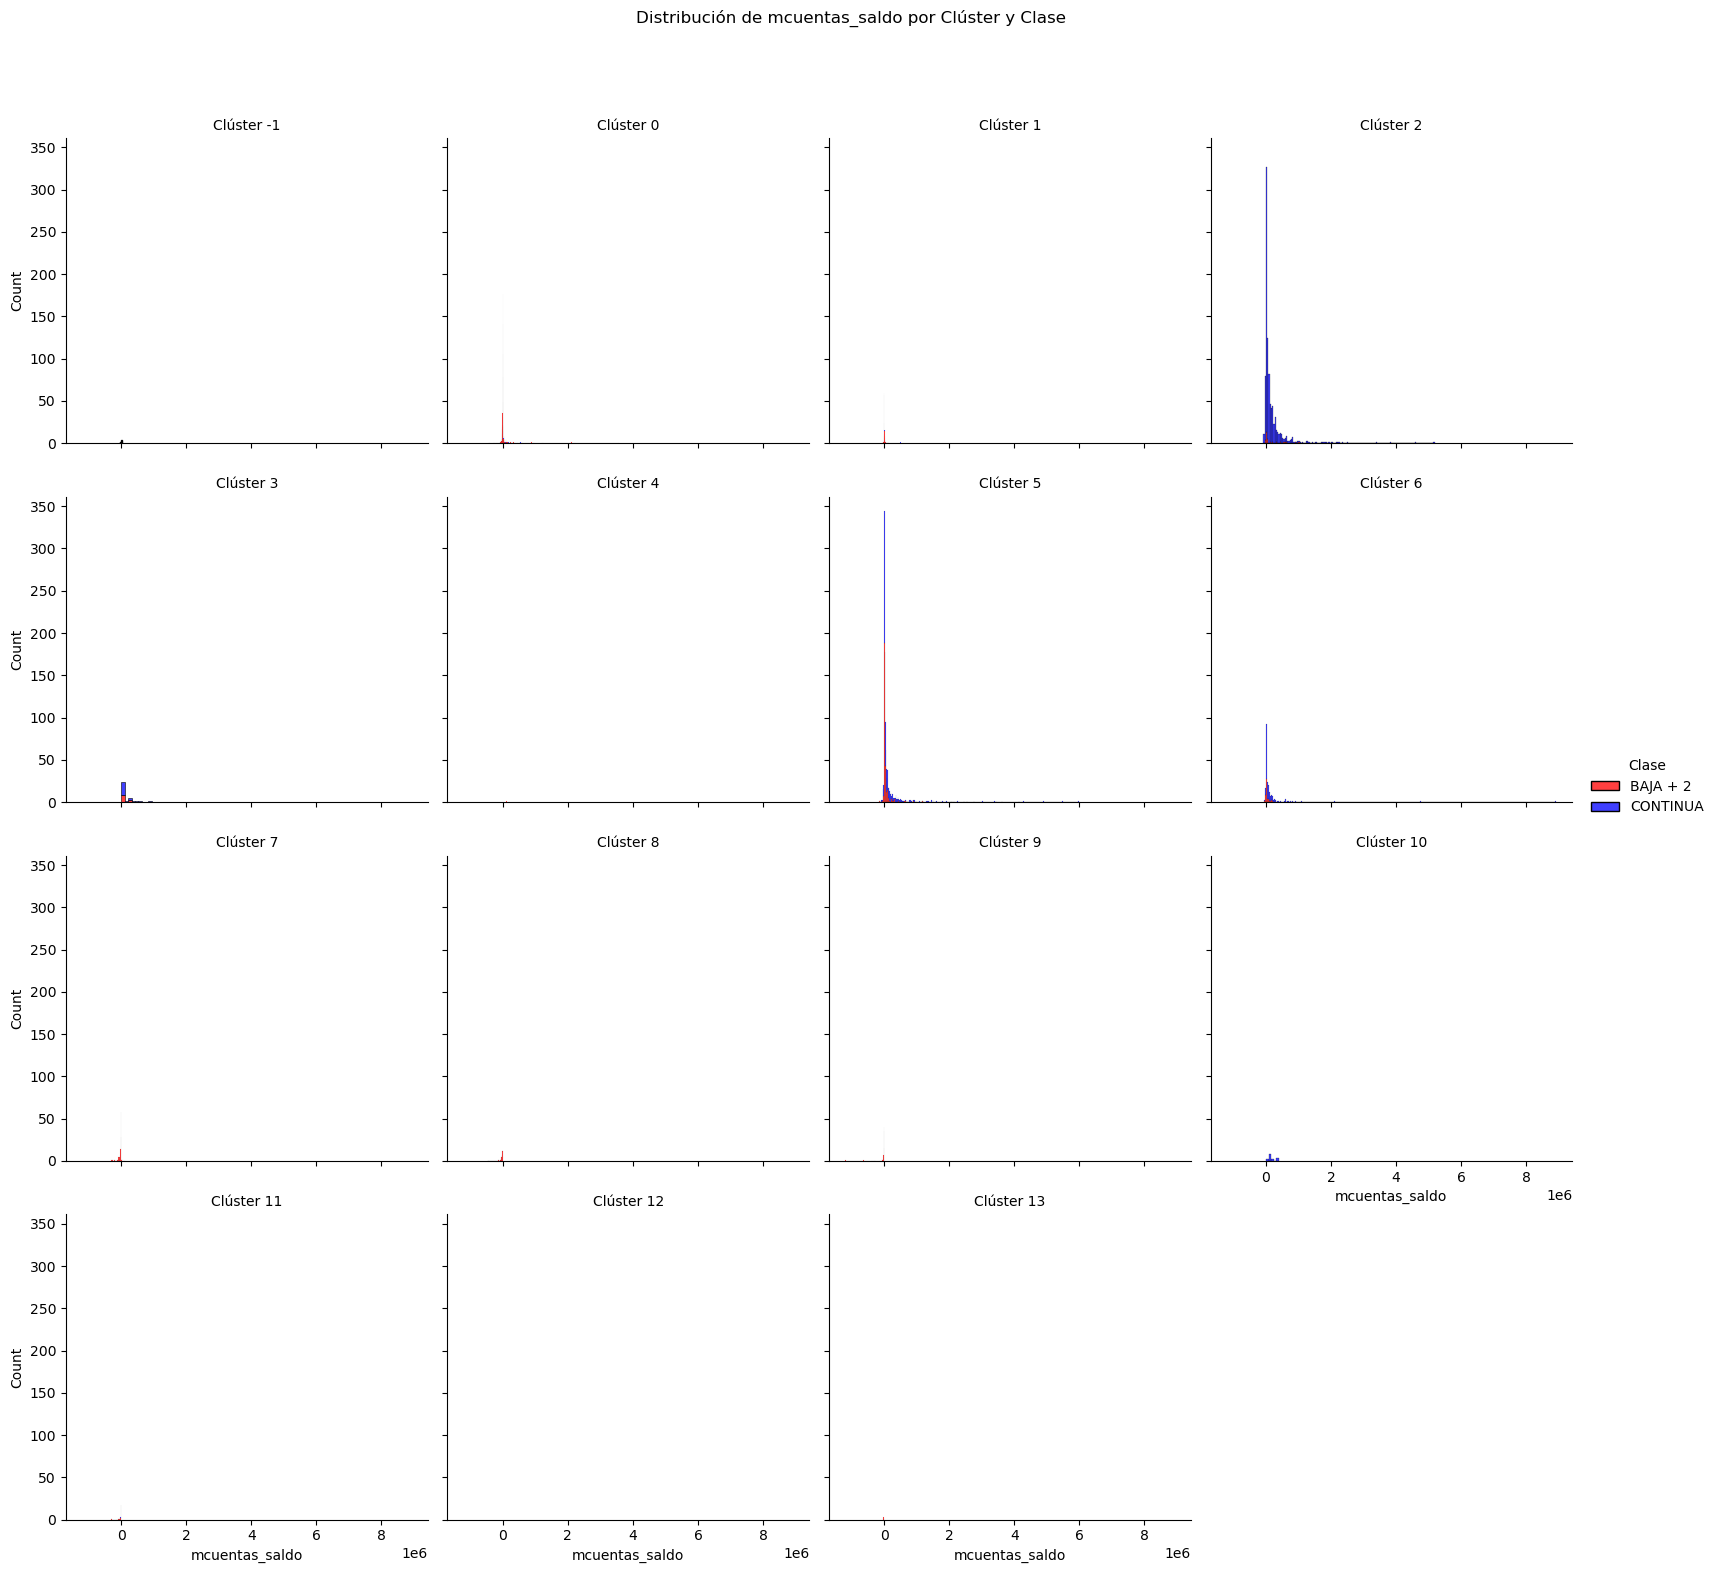

c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\seaborn\axisgrid.py:186: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



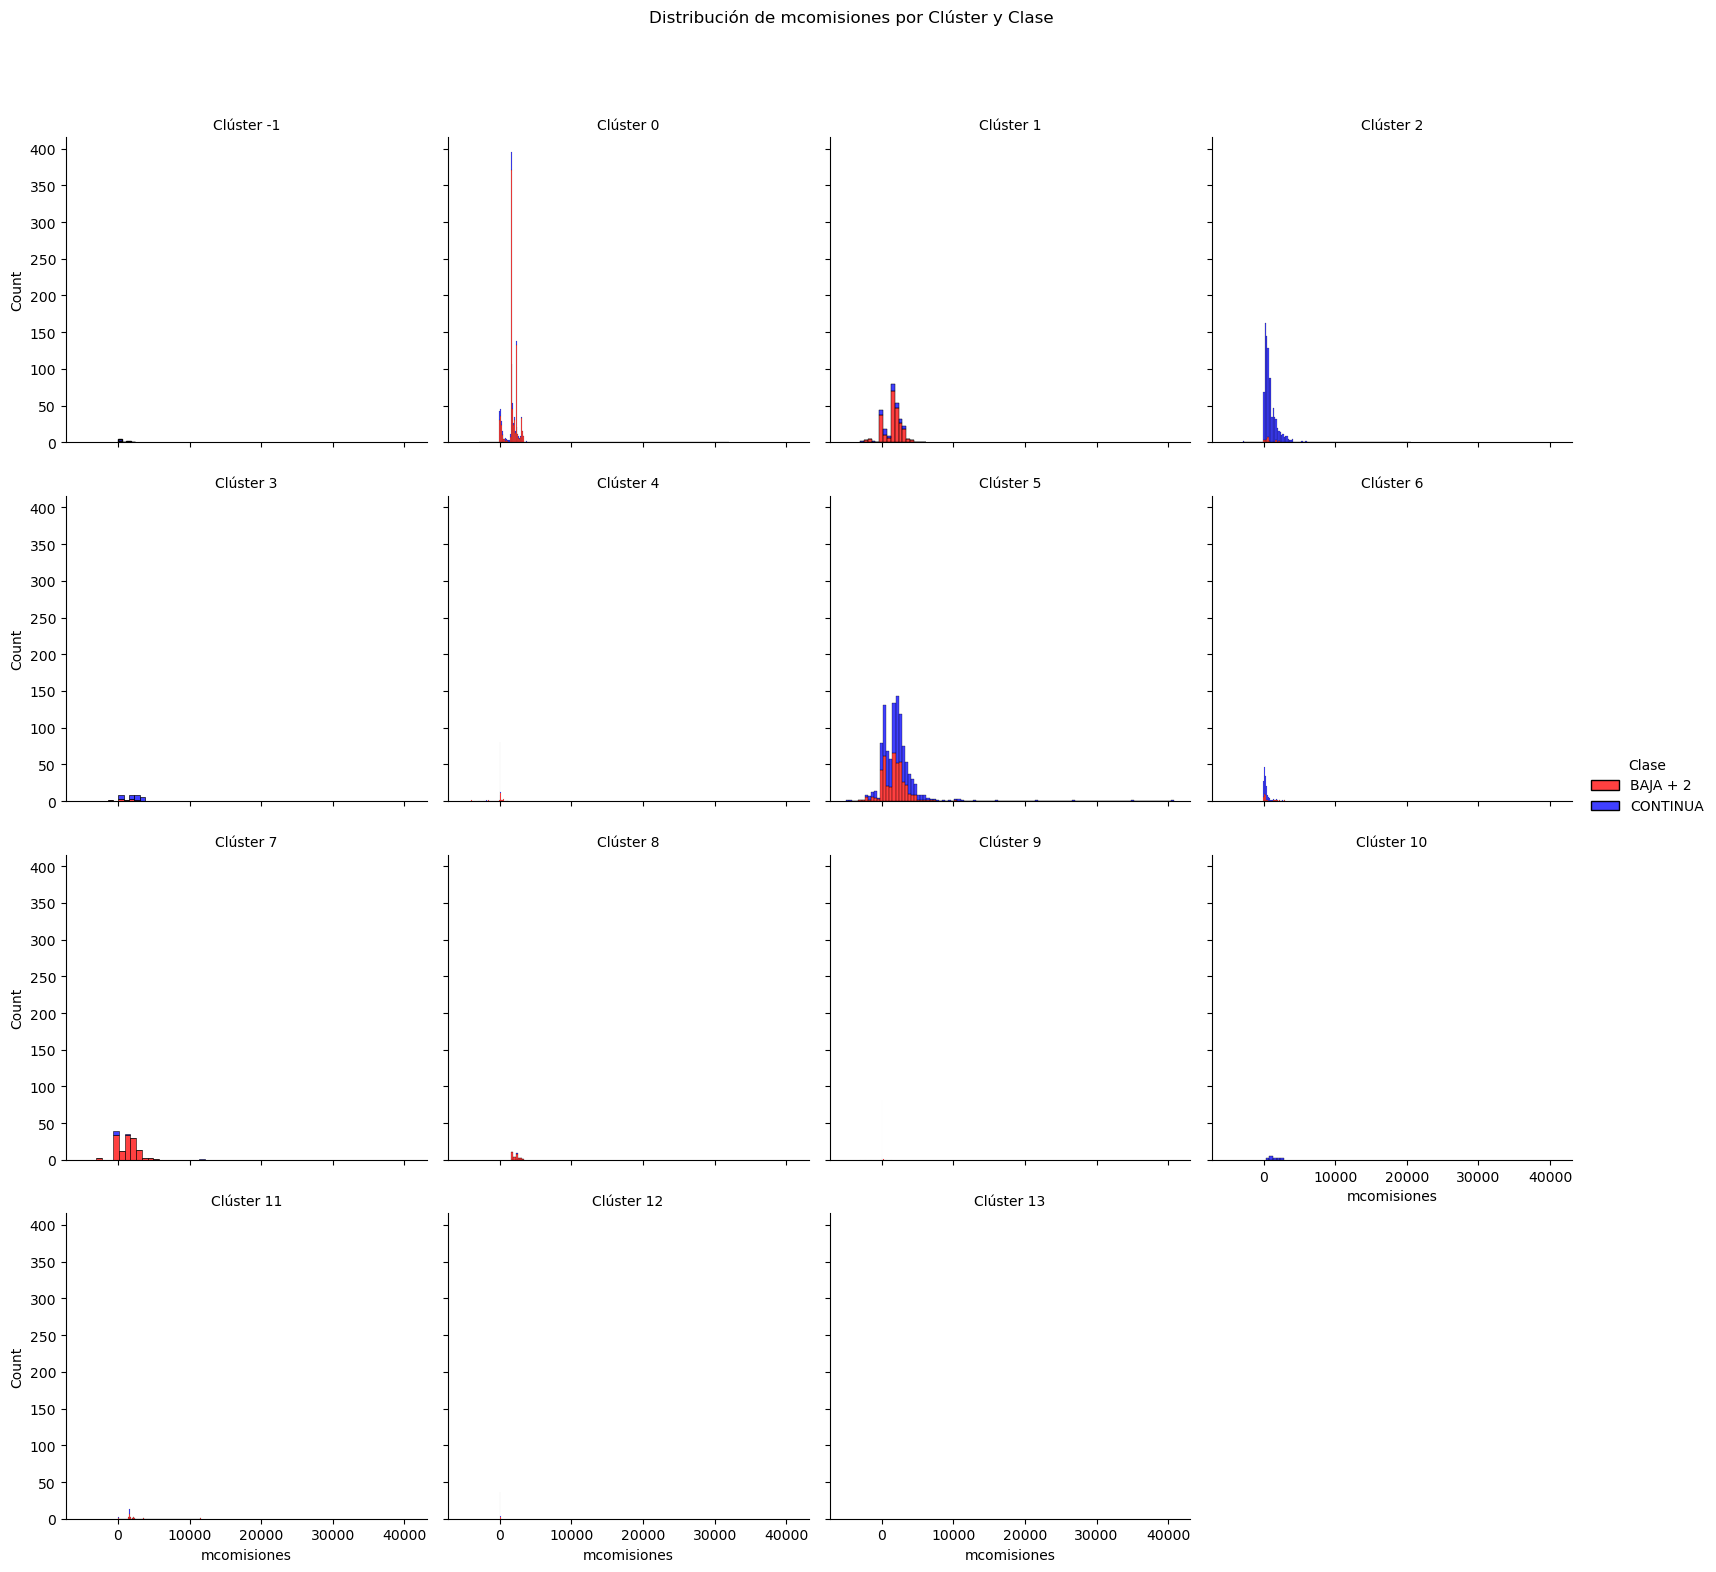

c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\seaborn\axisgrid.py:186: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



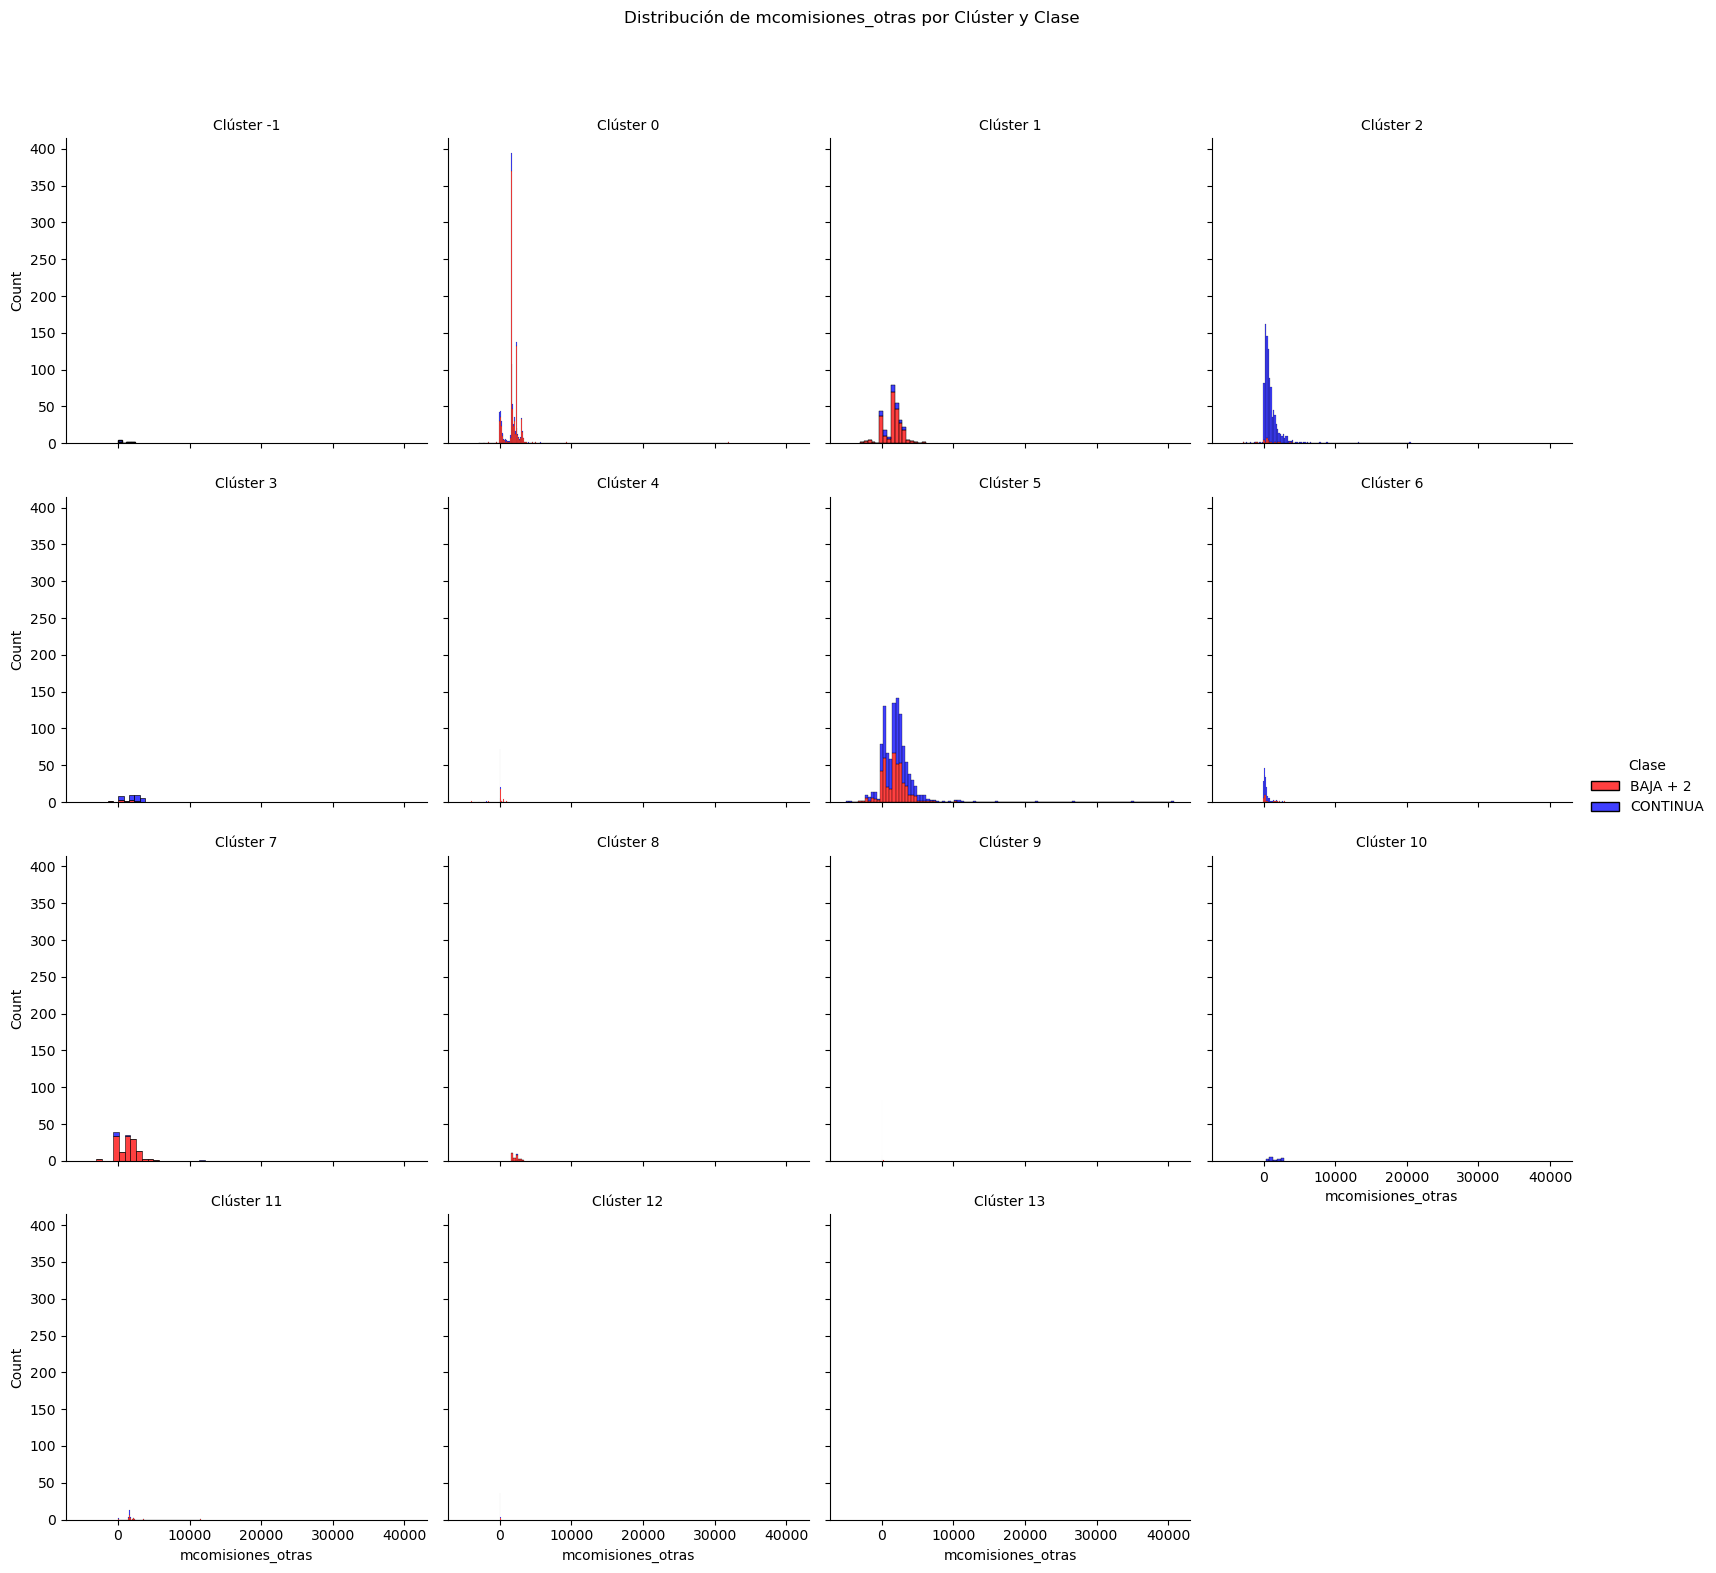

c:\Users\Admin\.conda\envs\datascience\Lib\site-packages\seaborn\axisgrid.py:186: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



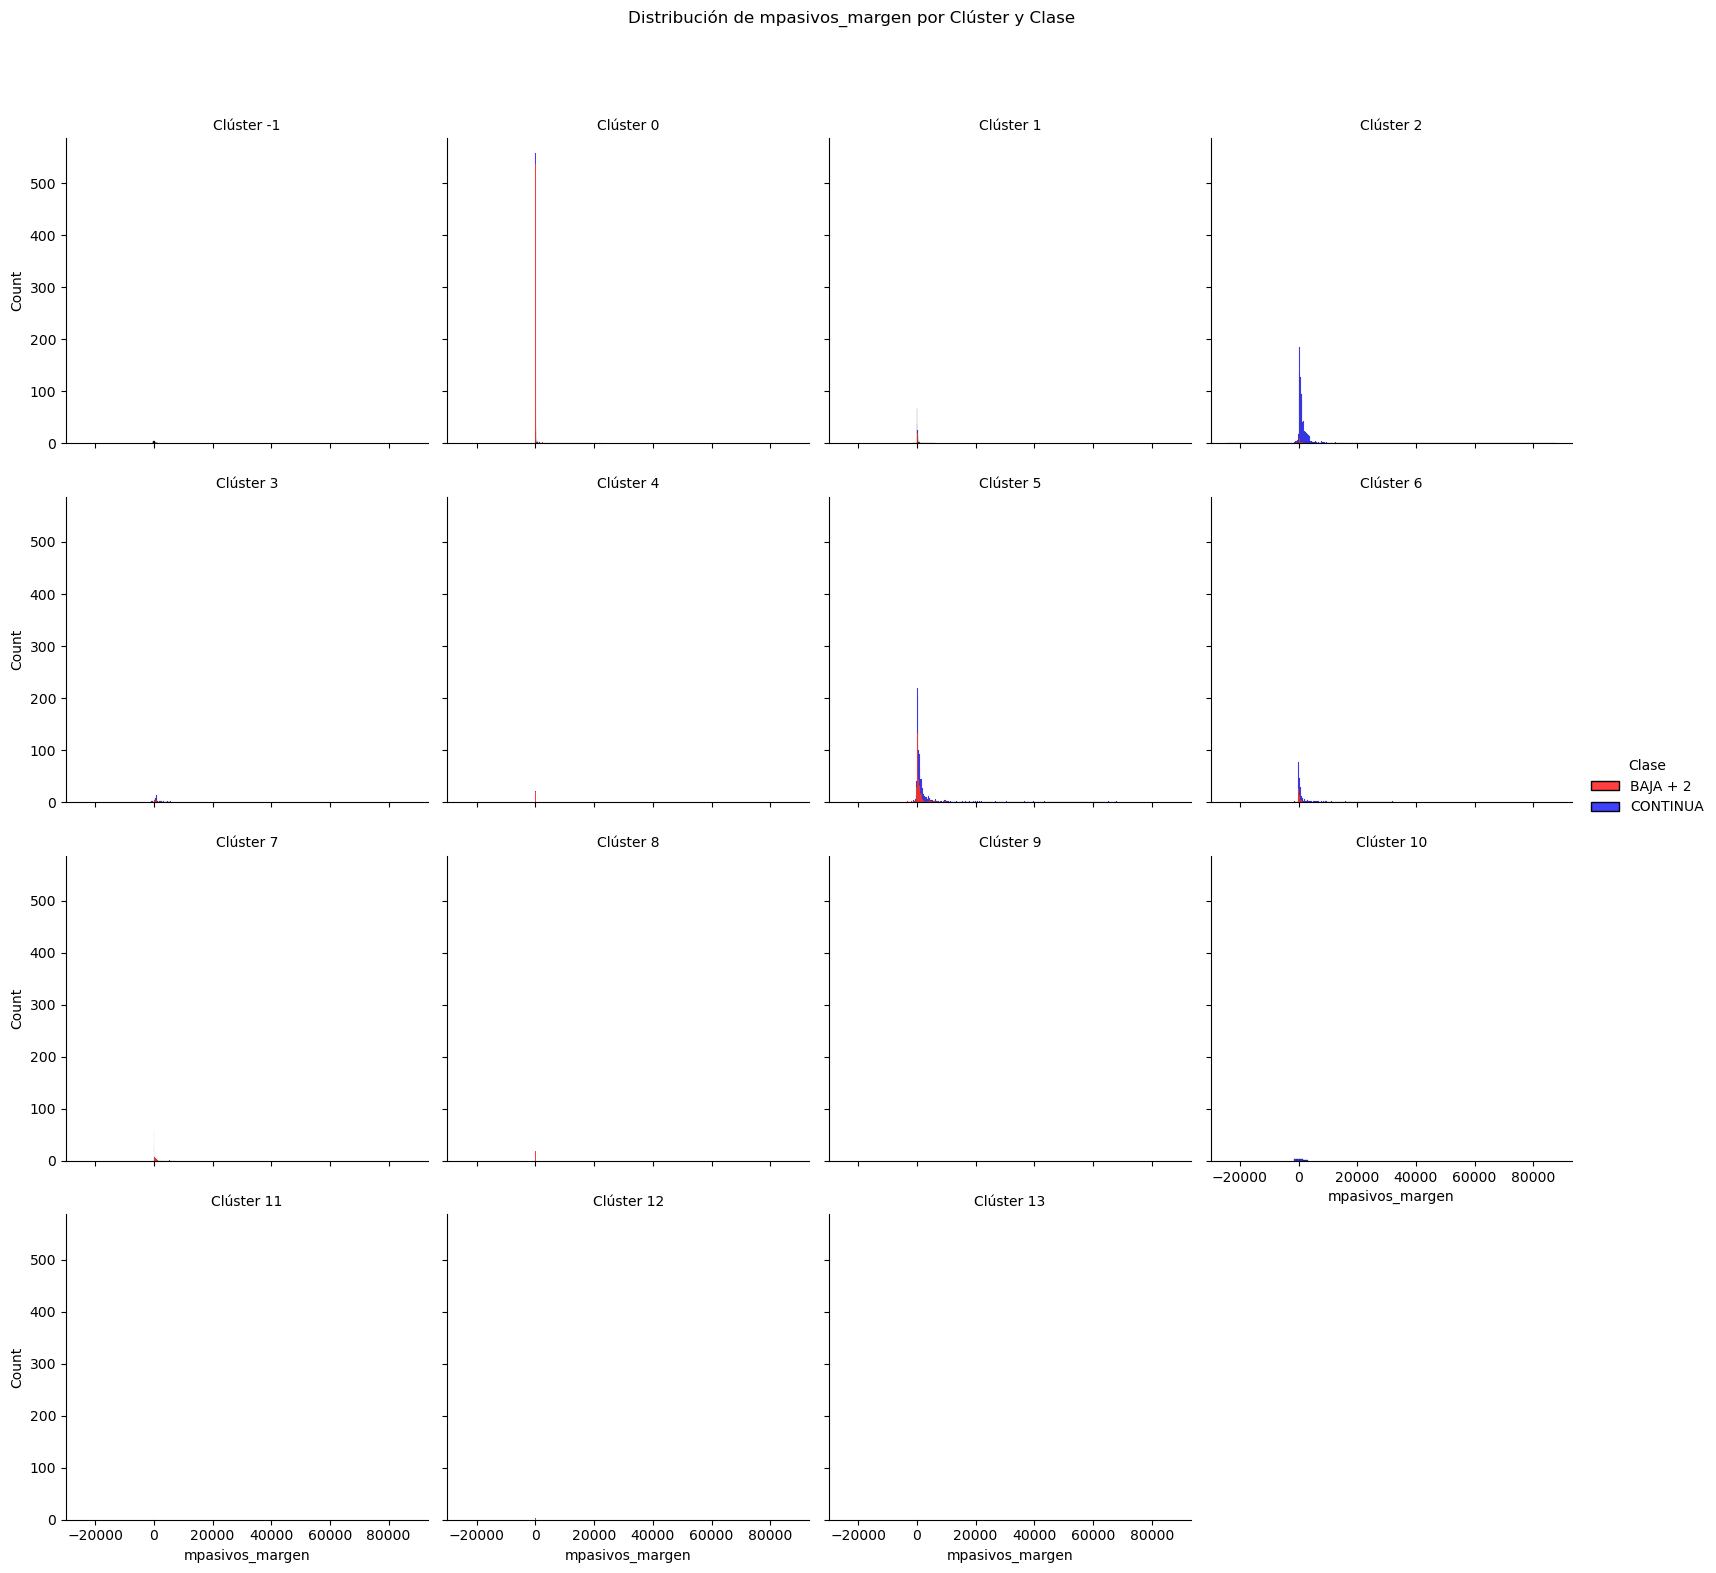

In [81]:


# Cluster 4 vs. Resto:
#   - mrentabilidad
#   - mcuentas_saldo
#   - mcomisiones
#   - mcomisiones_otras
#   - Visa_msaldototal
#   - lag_ctrx_quarter1
#   - mpasivos_margen
#   - ctrx_quarter


variables = ['mrentabilidad', 'mcuentas_saldo', 'mcomisiones', 'mcomisiones_otras', 'mpasivos_margen' ]

for var in variables:
    g = sns.FacetGrid(df_clustered, col='cluster', height=4, col_wrap=4)
    try:
        g.map_dataframe(
            sns.histplot,
            x=var,
            hue='class_label',
            multiple='stack',
            palette={0: 'blue', 1: 'red'}
        )
    except ValueError as e:
        print(f"Error al graficar el clúster {cluster}: {e}")
        continue
    g.add_legend(title='Clase', labels=['BAJA + 2','CONTINUA'])
    g.set_titles('Clúster {col_name}')
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Distribución de {var} por Clúster y Clase')
    plt.show()

In [82]:

# Variables a analizar
variables = ['mrentabilidad', 'mcuentas_saldo', 'mcomisiones', 'mcomisiones_otras', 'mpasivos_margen' ]

# Obtener los clústeres únicos
clusters = df_clustered['cluster'].unique()

for var in variables:
    # Crear subplots
    fig = make_subplots(rows=1, cols=len(clusters), subplot_titles=[f'Clúster {c}' for c in clusters])

    for i, cluster in enumerate(clusters):
        # Filtrar datos por clúster
        cluster_data = df_clustered[df_clustered['cluster'] == cluster]

        # Crear histograma
        hist = px.histogram(
            cluster_data,
            x=var,
            color='class_label',
            color_discrete_map={0: 'blue', 1: 'red'},
            barmode='stack'
        )

        # Añadir histograma al subplot
        for trace in hist['data']:
            fig.add_trace(trace, row=1, col=i+1)

    # Actualizar el layout
    fig.update_layout(
        title_text=f'Distribución de {var} por Clúster y Clase',
        showlegend=True,
        height=400,
        width=300 * len(clusters)
    )

    # Mostrar el gráfico
    fig.show()

In [94]:
import plotly.express as px
from plotly.subplots import make_subplots

variables = ['mrentabilidad', 'mcuentas_saldo', 'mcomisiones', 'mcomisiones_otras', 'mpasivos_margen']

# Obtener los clústeres únicos
clusters = df_clustered['cluster'].unique()

for var in variables:
    # Crear subplots
    fig = make_subplots(rows=1, cols=len(clusters), subplot_titles=[f'Clúster {c}' for c in clusters])

    for i, cluster in enumerate(clusters):
        # Filtrar datos por clúster
        cluster_data = df_clustered[df_clustered['cluster'] == cluster]

        # Crear boxplot
        box = px.box(
            cluster_data,
            y=var,
            color='class_label',
            color_discrete_map={0: 'blue', 1: 'red'}
        )

        # Añadir boxplot al subplot
        for trace in box['data']:
            fig.add_trace(trace, row=1, col=i+1)

    # Actualizar el layout
    fig.update_layout(
        title_text=f'Distribución de {var} por Clúster y Clase',
        showlegend=True,
        height=400,
        width=300 * len(clusters)
    )

    # Mostrar el gráfico
    fig.show()

In [83]:
df_clustered['lag_ctrx_quarter1']

15499      32.0
15603      14.0
15607       8.0
15842      21.0
15861      36.0
          ...  
857796      6.0
857845     11.0
857882     41.0
857888    118.0
857983     65.0
Name: lag_ctrx_quarter1, Length: 4176, dtype: float64

In [116]:
# Variables a analizar
variables = ['mrentabilidad', 'mcuentas_saldo', 'mcomisiones', 'mcomisiones_otras', 'mpasivos_margen']

# Agrupar por 'cluster' y calcular la media de las columnas especificadas
df_agg = df_clustered.groupby('cluster').agg(
    mcuentas_saldo_min=('mcuentas_saldo', 'min'),
    mcuentas_saldo_median=('mcuentas_saldo', 'median'),
    mcuentas_saldo_mean=('mcuentas_saldo', 'mean'),
    mcuentas_saldo_max=('mcuentas_saldo', 'max'),
    mrentabilidad_media =('mrentabilidad', 'mean'),
    movimientos=('ctrx_quarter', 'mean'),
    movimientos_tarjeta=('ctarjeta_visa_transacciones', 'mean'),
    limite_tarjeta=('Master_mfinanciacion_limite', 'mean'),
    intensidad_gasto=('intensidad_gasto', 'mean'),
    mtarjeta_visa_consumo=('mtarjeta_visa_consumo', 'mean'),
    sueldo_1=('mpayroll', 'mean'),
    sueldo_anterior1=('lag_mpayroll1', 'mean'), 
    sueldo_anterior2 =('lag_mpayroll2', 'mean')  # Asegúrate de que el nombre de la columna sea correcto
)
# Aplicar el gradiente de fondo de rojo a blanco
df_agg_styled = df_agg.style.background_gradient(cmap='Reds')

# Mostrar el DataFrame con el gradiente de fondo
df_agg_styled

In [118]:
df_clustered['cliente_antiguedad']

15499      42.0
15603      41.0
15607      41.0
15842      39.0
15861      39.0
          ...  
857796     45.0
857845    137.0
857882     72.0
857888    176.0
857983    175.0
Name: cliente_antiguedad, Length: 4176, dtype: float64

In [137]:
# Variables a analizar
variables = ['mrentabilidad', 'mcuentas_saldo', 'mcomisiones', 'mcomisiones_otras', 'mpasivos_margen']

# Agrupar por 'cluster' y calcular la media de las columnas especificadas
df_agg = df_clustered.groupby('cluster').agg(
    mcuentas_saldo_min=('mcuentas_saldo', 'min'),
    mcuentas_saldo_median=('mcuentas_saldo', 'median'),
    mcuentas_saldo_mean=('mcuentas_saldo', 'mean'),
    mcuentas_saldo_max=('mcuentas_saldo', 'max'),
    mpayroll = ('mpayroll', 'mean'),
    cpayroll_trx = ('cpayroll_trx', 'mean'),
    intensidad_gasto =('intensidad_gasto', 'mean'),
    mrentabilidad_media =('mrentabilidad', 'mean'),
    mcomisiones_media =('mcomisiones', 'mean'),
    mcomisiones_otras = ('mcomisiones_otras', 'mean'),
    mpasivos_margen = ('mpasivos_margen', 'mean'),    
    movimientos=('ctrx_quarter', 'median'),
    )
# Aplicar el gradiente de fondo de rojo a blanco
df_agg_styled = df_agg.style.background_gradient(cmap='Reds')

# Mostrar el DataFrame con el gradiente de fondo
df_agg_styled

##### Cluster 7 - Visa Status - Delinquency

In [110]:
# Variables a analizar
variables = [ 'mactivos_margen', 'mpasivos_margen', 'mactivos_margen_dd', 't_saldo_total', 'Visa_status', 'mrentabilidad', 'Visa_mpagominimo', 'ctrx_quarter']


# Agrupar por 'cluster' y calcular la media de las columnas especificadas
df_agg = df_clustered.groupby('cluster').agg(
    mactivos_margen=('mactivos_margen', 'mean'),
    mpasivos_margen=('mpasivos_margen', 'median'),
    mactivos_margen_dd=('mactivos_margen_dd', 'mean'),
    t_saldo_total=('t_saldo_total', 'mean'),
    Master_delinquency =('Master_delinquency', 'mean'),    
    Master_Finiciomora =('Master_Finiciomora', 'mean'),
    Visa_status =('Visa_status', 'mean'),
    Visa_mpagominimo_max =('Visa_mpagominimo', 'max'),
    Visa_mpagominimo_mean =('Visa_mpagominimo', 'mean'),
    movimientos=('ctrx_quarter', 'mean'),
    movimientos_tarjeta=('ctarjeta_visa_transacciones', 'mean')).reset_index()
    
# Aplicar el gradiente de fondo de rojo a blanco
df_agg_styled = df_agg.style.background_gradient(cmap='Reds')

# Mostrar el DataFrame con el gradiente de fondo
df_agg_styled

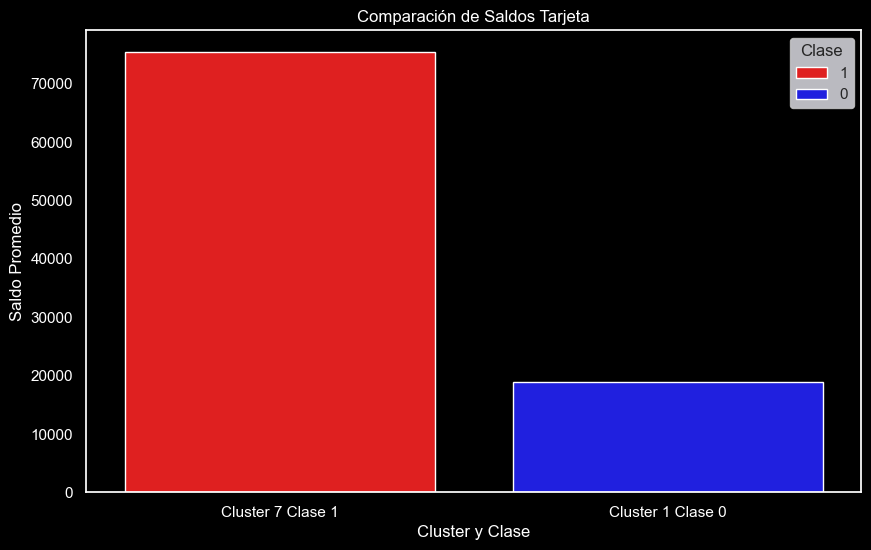

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar el DataFrame para obtener los datos necesarios
df_cluster_7_class_1 = df_clustered[(df_clustered['cluster'] == 7) & (df_clustered['class_label'] == 1)]
df_cluster_1_class_0 = df_clustered[(df_clustered['cluster'] == 1) & (df_clustered['class_label'] == 0)]

# Calcular el saldo promedio
mean_saldo_cluster_7_class_1 = df_cluster_7_class_1['t_saldo_total'].mean()
mean_saldo_cluster_1_class_0 = df_cluster_1_class_0['t_saldo_total'].mean()

# Crear un DataFrame para el gráfico
data = {
    'Cluster y Clase': ['Cluster 7 Clase 1', 'Cluster 1 Clase 0'],
    'Saldo Promedio': [mean_saldo_cluster_7_class_1, mean_saldo_cluster_1_class_0],
    'Clase': ['1', '0']  # Añadir una columna para la clase
}
df_plot = pd.DataFrame(data)

# Configurar el estilo de Seaborn
sns.set(style="dark")

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Gráfico de barras
ax = sns.barplot(
    x='Cluster y Clase', 
    y='Saldo Promedio', 
    data=df_plot,
    palette={'1': 'red', '0': 'blue'},  # Asignar colores a las clases
    hue='Clase'  # Usar la columna 'Clase' para asignar los colores
)

# Ajustar el color de las etiquetas y el título
ax.set_title('Comparación de Saldos Tarjeta', color='white')
ax.set_xlabel('Cluster y Clase', color='white')
ax.set_ylabel('Saldo Promedio', color='white')
ax.tick_params(colors='white')

# Cambiar el color del fondo de la figura y del eje
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# Mostrar el gráfico
plt.show()

In [168]:
df_cluster_7 = df_clustered[df_clustered['cluster'] == 7]
df_cluster_7.groupby('Visa_status').agg(Visa_status = ('Visa_status', 'count'), Master_delinquency = ('Master_delinquency', 'mean')).style.background_gradient(cmap='Blues')

In [169]:
df_cluster_8 = df_clustered[df_clustered['cluster'] == 8]
df_cluster_8.groupby('Visa_status').agg(Visa_status = ('Visa_status', 'count'), Master_delinquency = ('Master_delinquency', 'mean')).style.background_gradient(cmap='Blues')

In [170]:
df_cluster_9 = df_clustered[df_clustered['cluster'] == 9]
df_cluster_9.groupby('Visa_status').agg(Visa_status = ('Visa_status', 'count'), Master_delinquency = ('Master_delinquency', 'mean')).style.background_gradient(cmap='Blues')

##### Cluster 9

## Modelo

In [85]:

X = df_train[df_train['foto_mes'] <= 202104]

y = X['clase_ternaria']

X = X.drop(columns=['clase_ternaria'])

y_pred = df_train[df_train['foto_mes']==202106]
y_pred = y_pred['clase_ternaria']

ganancia_acierto = 273000
costo_estimulo = 7000

mes_train = 202102
mes_test = 202104

TypeError: Invalid comparison between dtype=datetime64[ns] and int

In [98]:
"""FUNCIONES VARIAS"""

def ganancia(model, X, y, prop=1, threshold=0.025):

  class_index = np.where(model.classes_ == "BAJA+2")[0][0]
  y_hat = model.predict_proba(X)

  @np.vectorize
  def ganancia_row(predicted, actual, threshold=0.025):
    return  (predicted >= threshold) * (ganancia_acierto if actual == "BAJA+2" else -costo_estimulo)

  return ganancia_row(y_hat[:,class_index], y).sum() / prop

sss = StratifiedShuffleSplit(n_splits=20,
                             test_size=0.3,
                             random_state=668)

# Función que paraleliza la construcción de árboles de decisión
def train_and_evaluate(train_index, test_index, params, X, y):
  m = DecisionTreeClassifier()
  m.fit(X.iloc[train_index],y.iloc[train_index])
  # Note que con el parámetro prop se corrige la distorsión por sampleo de la
  # ganancia
  ganancia_value = ganancia(m, X.iloc[test_index], y.iloc[test_index], prop=0.3)
  return m, ganancia_value






In [30]:

sss_opt = ShuffleSplit(n_splits=5, test_size=0.3, random_state=semillas[1])

def objective(trial, X, y, sss):
  criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
  max_depth = trial.suggest_int('max_depth', 2, 20)
  min_samples_split = trial.suggest_int('min_samples_split', 2, 200)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
  max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 20)

  def train_and_evaluate(train_index, test_index, X, y):
    m = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_leaf_nodes=max_leaf_nodes,
        random_state=semillas[1],
    )
    m.fit(X.iloc[train_index],y.iloc[train_index])
    ganancia_value = ganancia(m, X.iloc[test_index], y.iloc[test_index], prop=0.3)
    return ganancia_value

  results = Parallel(n_jobs=-1)(
      delayed(train_and_evaluate)(train_index, test_index, X, y)
      for train_index, test_index in sss.split(X)
  )

  return np.mean(results)

storage_name = "sqlite:///C:/Users/Admin/Documents/1_Notebook/1_Estudio/1 UBA Maestría DS/1_Especialización/1_Segundo Semestre/DMEyF/Python/Optuna/optimization_tree.db"
study_name = "exp_101_decision-tree-opt_02"

study = optuna.create_study(
    direction="maximize",
    study_name=study_name,
    storage=storage_name,
    load_if_exists=True,
)

study.optimize(lambda trial: objective(trial, X, y, sss_opt), n_trials=100)




[I 2024-09-16 13:22:44,850] Using an existing study with name 'exp_101_decision-tree-opt_02' instead of creating a new one.
[I 2024-09-16 13:23:23,014] Trial 100 finished with value: 350298666.6666667 and parameters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_split': 98, 'min_samples_leaf': 1, 'max_leaf_nodes': 20}. Best is trial 12 with value: 350298666.6666667.
[I 2024-09-16 13:24:01,137] Trial 101 finished with value: 350298666.6666667 and parameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 146, 'min_samples_leaf': 3, 'max_leaf_nodes': 20}. Best is trial 12 with value: 350298666.6666667.
[I 2024-09-16 13:24:38,712] Trial 102 finished with value: 350298666.6666667 and parameters: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 156, 'min_samples_leaf': 2, 'max_leaf_nodes': 20}. Best is trial 12 with value: 350298666.6666667.
[I 2024-09-16 13:25:15,955] Trial 103 finished with value: 349738666.6666667 and parameters: {'criterion': 'entr

KeyboardInterrupt: 

In [178]:
optuna.visualization.plot_optimization_history(study)

In [161]:
plot_slice(study)

In [162]:
plot_contour(study)

In [163]:
plot_contour(study, params=["max_depth", "max_leaf_nodes"])

### Variables más importantes

In [164]:
df_train.shape

(981946, 165)

In [179]:
# Obtener el mejor modelo
best_trial = study.best_trial
best_model_params = best_trial.params
print("Mejor modelo:", best_model_params)

model_best = DecisionTreeClassifier(**best_model_params, random_state=semillas[1])
model_best.fit(X, y)

importancias_model_best = model_best.feature_importances_

importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importancias_model_best
}).sort_values(by='importance', ascending=False)


print(f"Ganancia del mejor modelo: {ganancia(model_best, X, y)}")

importances_df.style.background_gradient(cmap='coolwarm')
pd.set_option('display.max_rows', 10)


Mejor modelo: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 191, 'min_samples_leaf': 6, 'max_leaf_nodes': 20}
Ganancia del mejor modelo: 342720000.0


### Predicción 

In [180]:
dtrain = df_train[df_train['foto_mes'] <= 202104]
dapply = df_train[df_train['foto_mes'] == 202106]


X_train = dtrain.drop(columns=['clase_ternaria'])
y_train = dtrain['clase_ternaria']
X_apply = dapply.drop(columns=['clase_ternaria'])


prediccion = model_best.predict_proba(X_apply)


prediccion_df = pd.DataFrame(prediccion, columns=model_best.classes_, index=X_apply.index)


prediccion_df['BAJA+2'] = (prediccion_df['BAJA+2'] > 0.025).astype(int)


df_train.loc[df_train['foto_mes'] == 202106, 'Predicted'] = prediccion_df['BAJA+2']


In [181]:
dapply['Predicted'] = prediccion_df['BAJA+2']

C:\Users\Admin\AppData\Local\Temp\ipykernel_11820\2307290294.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [182]:
resultado = dapply[['numero_de_cliente','Predicted']]
resultado.to_csv(r'C:\Users\Admin\Documents\1_Notebook\1_Estudio\1 UBA Maestría DS\1_Especialización\1_Segundo Semestre\DMEyF\Python\Competencias\Competencia_1\entrega_03.csv', index=False)

### Matriz de Correlación

In [45]:
lista_variables_utiles = importances_df[importances_df['importance'] > 0.01]['feature'].tolist()

<Axes: >

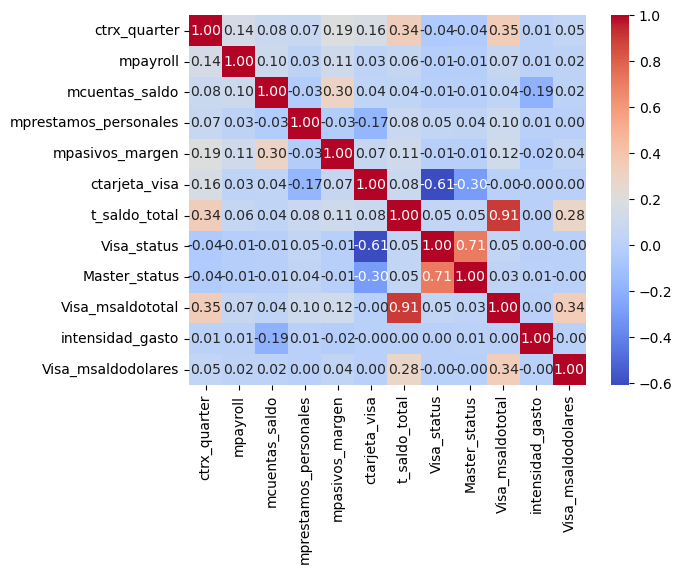

In [46]:
# Analisis de la correlación de Pearson de estas variables

df_train_abril = df_train[df_train['foto_mes'] == 202104]
df_train_abril = df_train.drop(columns=['clase_ternaria'])  
matriz_correlacion_abril = df_train_abril.corr()
matriz_correlacion_abril = matriz_correlacion_abril.loc[lista_variables_utiles, lista_variables_utiles]
sns.heatmap(matriz_correlacion_abril, annot=True, cmap='coolwarm', fmt=".2f")